# Capstone Projekt: Rossmann 
**Autor: Albert Heckmann**

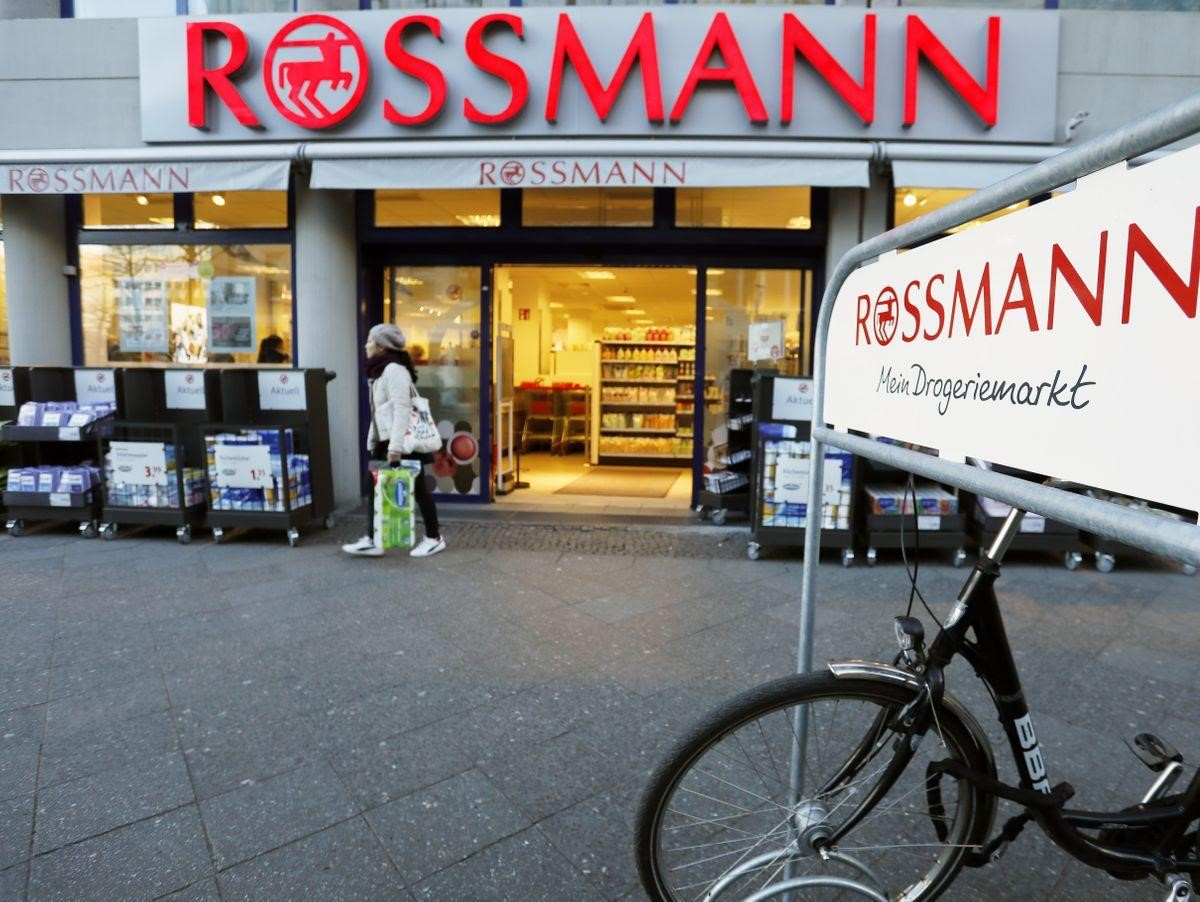 \
**Quelle:** 
[*"Drogeriekette Rossmann kommt gut durch die Krise"* - (www.manager-magazin.de) -](https://www.manager-magazin.de/unternehmen/handel/rossmann-drogeriekette-kommt-gut-durch-die-krise-a-dfb6ba83-ed64-4ab5-9aff-bc21f2c23785)

<a name="1"></a>
## 1. Einleitung 

## Inhaltsverzeichnis 

* [1 Einleitung](#1)
    * [1.1 Use-Case](#11)
    * [1.2 Beschreibung des Vorgehens](#12)      
* [2 Durchführung](#2)
    * [2.1 Einlesen und Bereinigen der Daten](#21)
    * [2.2 Train-Daten Vorverarbeiten](#22)
    * [2.3 Explorative Datenanalyse(EDA)](#23)
        * [2.3.1 Feiertage und Ferien](#231)
        * [2.3.2 Werbeaktionen](#232)
        * [2.3.3 Konkurrenzdistanz, Sortiment und Ladenmodell](#233)
* [3 Leistungsbericht](#3)
    * [3.1 Gesamtbericht aller Filialen](#31)
    * [3.2 Einzelbericht für Filiale](#32)
* [4 Modellierung](#4)
    * [4.1 Datenbereitstellung](#41)
    * [4.2 Prognosenmodellauswahl](#42)
    * [4.3 Ergebnisse der Prognose](#43)  
* [5 Abschluss](#5)
    * [5.1 Managment Summary](#51)
    * [5.2 Zukünftige Punkte](#52)

<a name="11"></a>
### 1.1 Use-Case

#### Aufgabenstellung: 
**Die Ermittlung von Vorhersagen der wöchentlichen Umsatzerlöse für den Drogeriemarkt Rossmann.**

Dieses Projekt soll untersuchen, welche Erkenntnisse Rossmann gewinnen kann aus den eigenen historischen Verkaufs- und Werbedaten sowie Daten zu Ferien, Feiertagen und Wettbewerbern. 

Aktuell sind Filialleiter beauftragt, 8-Wochen-Prognosen zu erstellen. \Daher sind Data Scientists des Unternehmens angewiesen worden, eine genaurere Vorhersagemethode zu ermitteln als die bisherige, über den histotischen Mittelwert..

Die Zielfrage ist, wie man diese Daten nutzen kann, um den Betrieb zu optimieren und mehr Umsatz zu generieren. 

Hierbei sollen die Datensätze **"store"** und **"train"** genutzt werden um eine Genauigkeitsprüfung erstellen zu können. 

<a name="12"></a>
### 1.2 Beschreibung des Vorgehens
* Die Daten sollen eingelesen und bereinigt werden.
* Ein Teil der Daten wird vorbereitet, in dem die täglichen Daten in wöchentliche Intervalle aggregiert werden.
* Ein anderer Teil der Daten wird auf die Gesamtsumme der Tage aggregiert, um eine faire Performanceanalyse durchzuführen. Da einige Filialen in bestimmten Zeiträumen geschlossen waren.
* Dann werden relevante Datensätze miteinander kombiniert, um daraus eine explorative Datenanalyse durchführen zu können.
* Nach der Analyse werden einmal ein Gesamtbericht für alle Filialen und ein Einzelbericht erstellt, um die Performance zu ermitteln.
* Es sollen verschiedene ML-Modelltypen getestet werden und mit der Durchschnittsmethode verglichen werden. (Die Durchschnittsmethode verwendet den historischen Mittelwert der vergangenen Beobachtungen.)
* Nach dem Vergleich wird das beste Modell ausgewählt, um die Prognosen zu ermitteln.
* Zum Schluss werden die wesentlichsten Punkte zusammengefasst und ein Ergebnis präsentiert.

<a name="2"></a>
## 2. Durchführung 

<a name="21"></a>
### 2.1 Einlesen und Bereinigen der Daten     

In [1]:
# Einlesen der anfänglichen Module.
import warnings
warnings.filterwarnings('ignore') # Um Warnungen zu ignorieren beim Kompelieren.
import pandas as pd # Import des Moduls, um einfacher mit Datensets arbeiten zu können. 
import numpy as np # Import des Moduls, um einfacher mit Arrays arbeiten zu können. 
import seaborn as sns # Import der Seaborn-Bibliothek für Diagrammdarstellung.
import matplotlib.pyplot as plt # Import des Moduls zum Plotten für Diagramme. 
%matplotlib inline 
# Magic-function die Plots direkt im Notebook plottet.

#### Einlesen der CSV-Datein.

In [2]:
store_df = pd.read_csv('store.csv')
train_df = pd.read_csv('train.csv', index_col='Date') # Zeilenindex auf Spalte "Date" setzen.

# Transformation des Zeilenindex in einen Zeitreihenindex.
train_df.index = pd.to_datetime(train_df.index)

Prüfen auf fehlende Werte in den Datensätzen.

In [3]:
train_df.isnull().sum() # Keine fehlende Werte

Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [4]:
store_df.isnull().sum() # Enthält fehlende Werte (NaN)

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Prüfen auf Datentypen

In [5]:
train_df.info() # Enthält Ganzzahlen und 1 Objekt(String).

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [6]:
store_df.info() # Neben den Ganzzahlen sind auch Float-Werte und Objekte(Strings) vorhanden.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Es wird eine Kopie der ursprünglichen Daten erstellt, um nur noch die Kopien zu editieren. \
Zwar kein muss aber als Backup-Lösung gedacht.

In [7]:
store_edit = store_df.copy()
train_edit = train_df.copy()

In [8]:
# Variable 'PromoInterval' prüfen auf Werte und Anzahl.
store_edit['PromoInterval'].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64

Zunächst die kategorialen Variablen in **ordinale** umwandeln. \
Vorteil hierbei: \
Der Merkmalsraum wird dadurch nicht unnötig vergrößert wie bei One-Hot-Kodierung.

**StoreType** = a,b,c,d => 0,1,2,3

In [9]:
store_edit['StoreType'] = store_edit['StoreType'].replace({'a': 0, 'b': 1, 'c': 2, 'd': 3})

**Assortment:** a(**0**) = **Basis**, b(**1**) = **Extra**, c(**2**) = **Erweitert**

In [10]:
store_edit['Assortment'] = store_edit['Assortment'].replace({'a': 0, 'b': 1, 'c': 2})

**PromoInterval:** **0** = (Jan,Apr,Jul,Oct), **1** = (Feb,May,Aug,Nov), **2** = (Mar,Jun,Sept,Dec)

In [11]:
store_edit['PromoInterval'] = store_edit['PromoInterval'].replace({'Jan,Apr,Jul,Oct' : 0, \
                                                                   'Feb,May,Aug,Nov': 1, \
                                                                   'Mar,Jun,Sept,Dec': 2})

#### Auswahl der Imputations-Technik: 
Behandlung der NaN-Werte im Dataframe. \
**Idee**: Nutzung des **HistGradientBoostingRegressor**, da dieser nativ fehlende Werte(NaN´s) behandeln kann.

In [12]:
from sklearn.ensemble import HistGradientBoostingRegressor # Import des Regressors.

# Erstellung einer Funktion.
def regression_imputation(df, target_column):

    # Aufteilung der Spalten in fehlende und vorhandene Werte.
    df_missing = df[df[target_column].isnull()] # entahlten nur die fehlenden Werte.
    df_not_missing = df.dropna(subset=[target_column]) # dropna entfernt fehlenden Werte.

    # Aufteilung in Features und Targets
    X_train = df_not_missing.drop(columns=[target_column]) # Feature der vorhandenen Werte.
    y_train = df_not_missing[target_column] # Target der vorhandenen Werte.
    X_test = df_missing.drop(columns=[target_column]) # Feature der fehlenden Werte.

    # Initialisierung des HistGradientboosting Regression Modells.
    # random_state gesetzt, für Testzwecke und Reproduzierbarkeit.
    model = HistGradientBoostingRegressor(random_state=0)  

    # Model trainieren.
    model.fit(X_train, y_train)

    # Vorhersage der fehlenden Target-Werte.
    predicted_values = model.predict(X_test)

    # Auffüllen der fehlenden Werte mit den Vorhersagen.
    # Dort wo das target_column fehlende Werte aufweist.
    df.loc[df[target_column].isnull(), target_column] = predicted_values

Um die Funktion nicht manuell mehrfach aufrufen zu müssen, wird hier eine Iteration durchgeführt nur mit ausgewählten Spaltenvariablen. \
Diese liegen in der Liste **regression_imputation_list** ab.

In [13]:
regression_imputation_list = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

for i in range (len(regression_imputation_list)):
    # Aufruf der Funktion mit Übergabeparametern
    regression_imputation(store_edit, regression_imputation_list[i])
    

Es gilt noch zu beachten, dass es zwar in **Promo2** keine fehlenden Werte gibt, aber in 
**Promo2SinceWeek**, **Promo2SinceYear** und **PromoInterval** mit jeweils **544**. \
Durch das Überprüfen der Werte und ihrer Häufigkeit von **Promo2** stellt sich heraus,
dass genau die Filialen, die nicht an fortlaufenden Werbeaktionen teilgenommen haben, die NaN-Werte besitzen.

In [14]:
store_edit['Promo2'].value_counts()

Promo2
1    571
0    544
Name: count, dtype: int64

In [15]:
# Prüfen ob noch NaN-Werte vorhanden sind
store_edit.isnull().sum() 

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Schließlich bleiben nur noch die NaN-Werte übrig wo **Promo2 = 0** war. \
Durch die **fillna**-Methode werden dann die restlichen NaN-Werte durch **0** ersetzt.

In [16]:
store_edit['Promo2SinceWeek'] = store_edit['Promo2SinceWeek'].fillna(0)
store_edit['Promo2SinceYear'] = store_edit['Promo2SinceYear'].fillna(0)
store_edit['PromoInterval'] = store_edit['PromoInterval'].fillna(0)

In [17]:
# Finales Prüfen
store_edit.isnull().sum() 

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Nun müssen die Float-Werte als Integer umgewandelt werden. \
Weil die bereits vorhandenen Float-Werte wie **CompetitionOpenSinceMonth/Year** keinen großen Sinn ergeben als Gleitkommazahl.  

In [18]:
store_edit['CompetitionDistance'] = store_edit['CompetitionDistance'].astype('int64')
store_edit['CompetitionOpenSinceMonth'] = store_edit['CompetitionOpenSinceMonth'].astype('int64')
store_edit['CompetitionOpenSinceYear'] = store_edit['CompetitionOpenSinceYear'].astype('int64')
store_edit['Promo2SinceWeek'] = store_edit['Promo2SinceWeek'].astype('int64')
store_edit['Promo2SinceYear'] = store_edit['Promo2SinceYear'].astype('int64')
store_edit['PromoInterval'] = store_edit['PromoInterval'].astype('int64')

Nun wird der Datensatz **train_edit** geprüft, ob die Datentypen passen. \
**Date** und **StateHoliday** sind jeweils Objekte. \
**StateHoliday** sollte ebenfalls in ordinale Variablen umgewandelt werden.

In [19]:
train_edit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


**StateHoliday:** a(**1**) = **öffentlicher Feiertag**, b(**2**) = **Osterferien**, c(**3**) = **Weihnachten**, **0** = **kein Feiertag**

In [20]:
train_edit['StateHoliday'] = train_edit['StateHoliday'].replace({'0': 0, 'a': 1, 'b': 2, 'c': 3})

In [21]:
# Kurzer Blick auf die ersten 5 Daten
print(train_edit.shape)
train_edit.head()

(1017209, 8)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


<a name="22"></a>
### 2.2 Train-Daten Vorverarbeiten

Für die explorative Datenanalyse müssen die Daten von **1115 Filialen** auf die Gesamtsumme der **942 Tage** aggregiert werden. \
Für **StateHoliday** werden Dummy-variablen erzeugt, da diese besser dargestellt werden können. 

In [22]:
# Erstellung von Dummy-Variablen
holi_dummy = pd.get_dummies(train_edit['StateHoliday'])

In [23]:
# Der Übersicht halber werden hier geeignete Namen für die Feiertage gewählt
holi_dummy = holi_dummy.rename(columns={0:'No_holi', 1:'Public_holi', 2:'Easter', 3:'Christmas'}) 

In [24]:
holi_dummy = holi_dummy*1 
# Um die True und False Werte schnell in 0 und 1 abzuwandeln, wird einfach mit 1 multipliziert.
holi_dummy.head()

,No_holi,Public_holi,Easter,Christmas
Date,,,,
2015-07-31,1,0,0,0
2015-07-31,1,0,0,0
2015-07-31,1,0,0,0
2015-07-31,1,0,0,0
2015-07-31,1,0,0,0


In [25]:
# Dummy-Feiertage zum bestehenden train Dataframe hinzufügen.
train_edit = pd.concat([train_edit, holi_dummy], axis=1) # axis=1, über die Spalten.

In [26]:
# Die ursprüngliche Spalte 'StateHoliday' entfernen, da sie nicht mehr gebraucht wird.
train_edit = train_edit.drop(['StateHoliday'], axis=1)

Betrachtung der Wochentage

In [27]:
train_edit['DayOfWeek'].value_counts()

DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64

Man erkennt das alle Wochentagen vertreten sind, also nicht nur die üblichen Arbeitstage Mo-Fr 

Erzeugen von Dummy-Variablen von **DayOfWeek**.

In [28]:
dummy_week_day = pd.get_dummies(train_edit['DayOfWeek'])

In [29]:
# Auch hier werden passende Namen gewählt, statt 1-7
dummy_week_day = dummy_week_day.rename(columns={1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', \
                                                5:'Fri',  6:'Sat', 7:'Sun',}) 

# Auch hier mit 1 multiplizieren für 0,1 statt True,False
dummy_week_day = dummy_week_day*1 

In [30]:
# Nun die Dummy-Wochentage zum bestehenden train Dataframe hinzufügen.
train_edit = pd.concat([train_edit, dummy_week_day], axis=1) # axis=1, über die Spalten

# Ebenfalls die alte Spalte entfernen, da sie nicht mehr gebraucht wird.
train_edit = train_edit.drop(['DayOfWeek'], axis=1)

Nun wurde das angepasste Dataframe **train_edit** so erstellt, dass es sich leichter interpretieren lässt. \
Das Aggregieren lässt sich besser durchführen, da jedes Merkmal klar definiert ist für jedes Datum und Filiale. \
Das Dataframe besitzt jetzt **17** Variablen (**16** Merkmale + **1** Zielvariable **Sales**).

In [31]:
train_edit

,Store,Sales,Customers,Open,Promo,SchoolHoliday,No_holi,Public_holi,Easter,Christmas,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,,,,,,,,,
2015-07-31,1,5263,555,1,1,1,1,0,0,0,0,0,0,0,1,0,0
2015-07-31,2,6064,625,1,1,1,1,0,0,0,0,0,0,0,1,0,0
2015-07-31,3,8314,821,1,1,1,1,0,0,0,0,0,0,0,1,0,0
2015-07-31,4,13995,1498,1,1,1,1,0,0,0,0,0,0,0,1,0,0
2015-07-31,5,4822,559,1,1,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-01-01,1111,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2013-01-01,1112,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2013-01-01,1113,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0


Der nächste Schritt wäre ein neues Dataframe **total_train_df** aus **train_edit** zu erzeugen,
wo die Summe aller wichtigen Merkmale und Zielvariablen pro Filiale in Bezug auf die gesamten Tage dargestellt werden. \
Anschließend müssen noch weitere Merkmale erzeugt werden wie der durchschnittliche tägliche Verkaufserlös, 
die durchschnittliche tägliche Kundenanzahl und die Verkäufe pro Kunde um die Performance der Filialen
abbilden zu können, da einige zu bestimmten Zeiten geschlossen waren (z.B. Renovierungsarbeiten).

In [32]:
# Dataframe auf Store gruppieren und die Summe aller Werte erzeugen.
total_train_df = train_edit.groupby('Store').sum() 

In [33]:
# Die Variablennamen sollten angepasst werden, da es nun Summenwerte(total) sind.
total_train_df = total_train_df.rename(columns={'Sales':'Total_sales', 'Customers':'Total_customers', \
                                                'Open':'Total_open', 'Promo':'Total_promo', 'SchoolHoliday':'Total_SchoolHoliday', \
                                                'No_holi':'Total_no_holi','Public_holi':'Total_public_holi', 'Easter':'Total_easter', \
                                                'Christmas':'Total_christmas', 'Mon':'Total_mon', 'Tue':'Total_tue', 'Wed':'Total_wed', \
                                                'Thu':'Total_thu', 'Fri':'Total_fri', 'Sat':'Total_sat', 'Sun':'Total_sun'})

In [34]:
total_train_df

,Total_sales,Total_customers,Total_open,Total_promo,Total_SchoolHoliday,Total_no_holi,Total_public_holi,Total_easter,Total_christmas,Total_mon,Total_tue,Total_wed,Total_thu,Total_fri,Total_sat,Total_sun
Store,,,,,,,,,,,,,,,,
1,3716854,440523,781,360,193,915,17,6,4,134,135,135,135,135,134,134
2,3883858,457855,784,360,167,917,15,6,4,134,135,135,135,135,134,134
3,5408261,584310,779,360,170,913,19,6,4,134,135,135,135,135,134,134
4,7556507,1036254,784,360,173,918,14,6,4,134,135,135,135,135,134,134
5,3642818,418588,779,360,172,911,21,6,4,134,135,135,135,135,134,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,4091076,351883,779,360,170,913,19,6,4,134,135,135,135,135,134,134
1112,7974294,653276,779,360,170,913,19,6,4,134,135,135,135,135,134,134
1113,5196242,562151,784,360,159,918,14,6,4,134,135,135,135,135,134,134


**Vorbereitung der Daten zur späteren Modellierung.** \
Die täglichen Verkäufe sollen zu wöchentlichen für jede Filiale aggregiert werden. \
Entwicklung eines Prognosenmodells auf wöchentlicher Basis.

In [35]:
# Gruppierung auf die Filialen, dann in Wochenintervalle umwandeln und die Summe aller Spalten ermitteln.
week_data_df = train_edit.groupby(['Store']).resample('W').sum()

In [36]:
# Die aufsummierte Spalte Store entfernen und Index zurücksetzen.
week_data_df = week_data_df.drop(columns='Store', axis=1).reset_index()

In [37]:
# Den Zeitindex auf Date setzen und die alte Spalte 'Date' entfernen, da nicht mehr gebraucht.
week_data_df = week_data_df.set_index(pd.DatetimeIndex(week_data_df['Date'])).drop(columns='Date', axis=1)

In [38]:
week_data_df

,Store,Sales,Customers,Open,Promo,SchoolHoliday,No_holi,Public_holi,Easter,Christmas,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,,,,,,,,,
2013-01-06,1,19340,2500,4,0,6,5,1,0,0,0,1,1,1,1,1,1
2013-01-13,1,32952,3918,6,5,5,7,0,0,0,1,1,1,1,1,1,1
2013-01-20,1,25978,3417,6,0,0,7,0,0,0,1,1,1,1,1,1,1
2013-01-27,1,33071,3862,6,5,0,7,0,0,0,1,1,1,1,1,1,1
2013-02-03,1,28693,3561,6,0,0,7,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-05,1115,48130,2982,6,5,0,7,0,0,0,1,1,1,1,1,1,1
2015-07-12,1115,36233,2531,6,0,0,7,0,0,0,1,1,1,1,1,1,1
2015-07-19,1115,45927,3057,6,5,0,7,0,0,0,1,1,1,1,1,1,1


Das Dataframe **week_data_df** wird noch relevant für die Modellierung in **Kapitel 4**.

<a name="23"></a>
### 2.3 Explorative Datenanalyse(EDA)

Betrachten wir nun die Statistiken der Daten in **total_train_df**.

In [39]:
total_train_df.describe()

,Total_sales,Total_customers,Total_open,Total_promo,Total_SchoolHoliday,Total_no_holi,Total_public_holi,Total_easter,Total_christmas,Total_mon,Total_tue,Total_wed,Total_thu,Total_fri,Total_sat,Total_sun
count,1.115000e+03,1.115000e+03,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.0,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,5.267427e+06,5.776159e+05,757.302242,348.053812,162.978475,884.447534,18.170404,6.0,3.677130,129.802691,130.640359,130.641256,130.802691,130.802691,129.802691,129.802691
std,1.951304e+06,3.046545e+05,63.861126,27.239162,20.467724,68.278983,2.741008,0.0,0.736194,9.570517,9.938265,9.938613,9.570517,9.570517,9.570517,9.570517
min,2.114322e+06,1.875830e+05,592.000000,286.000000,124.000000,729.000000,13.000000,6.0,2.000000,108.000000,108.000000,108.000000,109.000000,109.000000,108.000000,108.000000
25%,3.949377e+06,4.053910e+05,776.000000,360.000000,155.000000,911.000000,15.000000,6.0,4.000000,134.000000,135.000000,135.000000,135.000000,135.000000,134.000000,134.000000
50%,4.990259e+06,5.092330e+05,779.000000,360.000000,170.000000,913.000000,19.000000,6.0,4.000000,134.000000,135.000000,135.000000,135.000000,135.000000,134.000000,134.000000
75%,6.084148e+06,6.715440e+05,782.000000,360.000000,172.000000,917.000000,21.000000,6.0,4.000000,134.000000,135.000000,135.000000,135.000000,135.000000,134.000000,134.000000
max,1.951684e+07,3.206058e+06,942.000000,360.000000,209.000000,918.000000,22.000000,6.0,4.000000,134.000000,135.000000,135.000000,135.000000,135.000000,134.000000,134.000000


Der Min/Max von **Total_sales** variiert zwischen ca. 2,1 - 19,5 Mio. Euro was erheblich ist (Faktor 9,3). \
Die Min/Max von **Total_customers** belaufen sich von ca. 187.500 - 3.200.000, was ebenfalls erheblich ist (Faktor 17). \
Der Min/Max für **Total_open** variiert deutlich (Faktor 1,6). \
Was daran liegen könnte, dass einige Filialen renovierungsarbeiten durchgeführt haben und in der Zeit nicht offen waren. 

Um zunächst die Performance einer einzelnen Filiale zu ermitteln sind neue Metriken nötig wie:
* Durchschnittliche tägliche Verkäufe
* Durchschnittliche tägliche Kundenanzahl
* Verkauf pro Kunde 

Für diesen Metrik-Fall wird ein neues Dataframe erzeugt mit den entsprechenden Werten.

In [40]:
# Eine Kopie vom total_train_df erzeugen mit allen Werten.
total_train_metric_df = total_train_df.copy()

Die durchschnittlichen Tagesverkäufe ergeben sich aus Gesamtverkauf durch die Anzahl der Tage, die die Filiale offen hatte. \
Somit werden die Filialen berücksichtigt, die kurzzeitig Geschlossen waren. 

In [41]:
total_train_metric_df['Mean_daily_sales'] = total_train_metric_df['Total_sales'] / total_train_metric_df['Total_open']

Die durchschnittliche Tageskundenanzahl ergibt sich aus Gesamtanzahl der Kunden durch die Anzahl der Tage, die die Filiale offen hatte.

In [42]:
total_train_metric_df['Mean_daily_customers'] = total_train_metric_df['Total_customers'] / total_train_metric_df['Total_open']

Das Verhältnis Verkauf pro Kunde, erhält man aus Gesamtverkäufe durch Gesamtanzahl der Kunden, an den Tagen wo geöffnet war. 

In [43]:
total_train_metric_df['Sales_per_customer'] = total_train_metric_df['Mean_daily_sales'] / total_train_metric_df['Mean_daily_customers']

In [44]:
# Die nicht benötigten Spalten entfernen (Spalte 1 einschließlich, 16 ausschließlich).
total_train_metric_df.drop(total_train_metric_df.iloc[:, :16], inplace=True, axis=1)

In [45]:
# Die Nachkommastellen der jeweiligen Variablen anpassen.
total_train_metric_df['Mean_daily_sales'] = total_train_metric_df['Mean_daily_sales'].round(2)
total_train_metric_df['Mean_daily_customers'] = total_train_metric_df['Mean_daily_customers'].round()
total_train_metric_df['Sales_per_customer'] = total_train_metric_df['Sales_per_customer'].round(2)

In [46]:
total_train_metric_df

,Mean_daily_sales,Mean_daily_customers,Sales_per_customer
Store,,,
1,4759.10,564.0,8.44
2,4953.90,584.0,8.48
3,6942.57,750.0,9.26
4,9638.40,1322.0,7.29
5,4676.27,537.0,8.70
...,...,...,...
1111,5251.70,452.0,11.63
1112,10236.58,839.0,12.21
1113,6627.86,717.0,9.24


Im ersten Schritt wäre interessant zu wissen, wie viele Filialen die besten Sales-per-customer-Werte haben. \
Die Statistik zeigt, dass der Verkauf/Kunde bei durchschnittlich **9.6** liegt,
die 75-Perzentile bei knapp **11** und das Maximum bei **16**.

In [47]:
total_train_metric_df.describe()

,Mean_daily_sales,Mean_daily_customers,Sales_per_customer
count,1115.000000,1115.000000,1115.000000
mean,6934.208511,754.505830,9.643659
std,2383.911253,353.328971,1.986955
min,2703.740000,240.000000,3.510000
25%,5322.300000,541.500000,8.130000
50%,6589.950000,679.000000,9.460000
75%,7964.200000,866.000000,10.980000
max,21757.480000,3403.000000,16.160000


Es wird ein kurzer Blick darauf geworfen, wie sich die Daten verteilen zu den durchschnittlichen täglichen
Verkäufen und Kundenanzahlen.

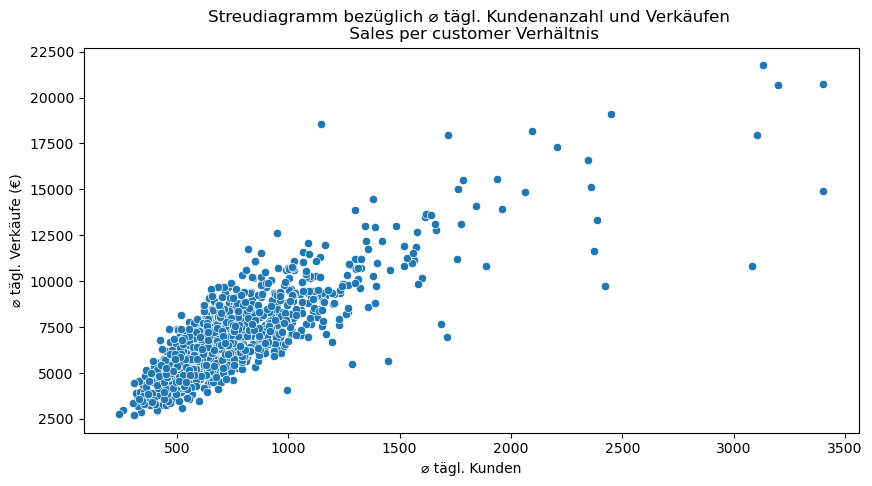

In [48]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(10, 5))

# Streudiagramm bezüglich durchsch. tägl. Kunden zu Verkäufen.
sns.scatterplot(ax=ax, data = total_train_metric_df, x = 'Mean_daily_customers', y = 'Mean_daily_sales');

# Titelüberschrift.
ax.set_title('Streudiagramm bezüglich ⌀ tägl. Kundenanzahl und Verkäufen \n Sales per customer Verhältnis');
# Bezeichnung für die X un Y-Achsen.
ax.set(xlabel='⌀ tägl. Kunden', ylabel='⌀ tägl. Verkäufe (€)');
plt.show();

Im Bereich der Verkäufe bis ca. 10.000 € und Kundenanzahl bis ca. 1000 ist die Datenpunktwolke am dichtesten und nimmt danach
deutlich ab. \
Der allgemeine Verlauf der Grafik deutet auf eine positive Korrelation, die aber zu einem gewissen Punkt
anfängt stark zu streuen bzw. auszureißen.

Bevor die explorative Datenanalyse (EDA) beginnt,
wird auf das Datenframe **total_train_df** zurückgegriffen, wo die 1115 Filialen auf Basis der 
Gesamtsummentage von 942 aggregiert wurden. \
Zusätzlich kommt das Dataframe **store_edit** hinzu, welches weiter Merkmale pro Filiale besitzt. \
Die Merkmale aus den druchschnittlich täglichen Werten von **total_train_metric_df** müssen ebenfalls berücksichtigt werden,
um die Performance fair analysieren zu können. \
Durch die Kombination der 3 Dataframes erhält man alle nötigen Werte für die EDA. 

In [49]:
# Den Index des Dataframes auf Variable Store anpassen.
store_edit = store_edit.set_index('Store')

In [50]:
# Über concat-Methode beide Dataframes zusammenführen entlang der Spalte (axis=1).
train_store_df = pd.concat([total_train_df, store_edit], axis=1)

In [51]:
# Nun die durch. tägl. Merkmale von total_train_metric_df ebenfalls hinzufügen.
train_store_df['Mean_daily_sales'] = total_train_metric_df['Mean_daily_sales']
train_store_df['Mean_daily_customers'] = total_train_metric_df['Mean_daily_customers']
train_store_df['Sales_per_customer'] = total_train_metric_df['Sales_per_customer']

In [52]:
pd.set_option('display.max_columns', None) # Hilfreich um sich alle Spalten in einem Dataframe anzeigen zu lassen.

In [53]:
train_store_df

,Total_sales,Total_customers,Total_open,Total_promo,Total_SchoolHoliday,Total_no_holi,Total_public_holi,Total_easter,Total_christmas,Total_mon,Total_tue,Total_wed,Total_thu,Total_fri,Total_sat,Total_sun,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Mean_daily_sales,Mean_daily_customers,Sales_per_customer
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3716854,440523,781,360,193,915,17,6,4,134,135,135,135,135,134,134,2,0,1270,9,2008,0,0,0,0,4759.10,564.0,8.44
2,3883858,457855,784,360,167,917,15,6,4,134,135,135,135,135,134,134,0,0,570,11,2007,1,13,2010,0,4953.90,584.0,8.48
3,5408261,584310,779,360,170,913,19,6,4,134,135,135,135,135,134,134,0,0,14130,12,2006,1,14,2011,0,6942.57,750.0,9.26
4,7556507,1036254,784,360,173,918,14,6,4,134,135,135,135,135,134,134,2,2,620,9,2009,0,0,0,0,9638.40,1322.0,7.29
5,3642818,418588,779,360,172,911,21,6,4,134,135,135,135,135,134,134,0,0,29910,4,2015,0,0,0,0,4676.27,537.0,8.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,4091076,351883,779,360,170,913,19,6,4,134,135,135,135,135,134,134,0,0,1900,6,2014,1,31,2013,0,5251.70,452.0,11.63
1112,7974294,653276,779,360,170,913,19,6,4,134,135,135,135,135,134,134,2,2,1880,4,2006,0,0,0,0,10236.58,839.0,12.21
1113,5196242,562151,784,360,159,918,14,6,4,134,135,135,135,135,134,134,0,2,9260,5,2007,0,0,0,0,6627.86,717.0,9.24


<a name="231"></a>
#### 2.3.1 Feiertage und Ferien

Zunächst wäre interessant zu wissen, wie das Verhältnis von **Sales_per_customer** 
zu den **Feiertagen** ist.

In [54]:
# Datensatz filtern bezüglich aller Situationen der Feiertagen.
no_holi_df = train_edit[(train_edit['No_holi'] == 1)&(train_edit['Open']==1)]
public_df = train_edit[(train_edit['Public_holi'] == 1)&(train_edit['Open']==1)]
christ_df = train_edit[(train_edit['Christmas'] == 1)&(train_edit['Open']==1)]
easter_df = train_edit[(train_edit['Easter'] == 1)&(train_edit['Open']==1)]

In [55]:
# Nach Filiale gruppieren und Werte summieren.
no_holi_df = no_holi_df.groupby('Store').sum()
public_df = public_df.groupby('Store').sum()
christ_df = christ_df.groupby('Store').sum()
easter_df = easter_df.groupby('Store').sum()

In [56]:
# Variable Verkauf pro Kunde erzeugen.
no_holi_df['Sales_per_customer'] = (no_holi_df['Sales'] * no_holi_df['Open']) / (no_holi_df['Customers'] * no_holi_df['Open'])
public_df['Sales_per_customer'] = (public_df['Sales'] * public_df['Open']) / (public_df['Customers'] * public_df['Open'])
christ_df['Sales_per_customer'] = (christ_df['Sales'] * christ_df['Open']) / (christ_df['Customers'] * christ_df['Open'])
easter_df['Sales_per_customer'] = (easter_df['Sales'] * easter_df['Open']) / (easter_df['Customers'] * easter_df['Open'])

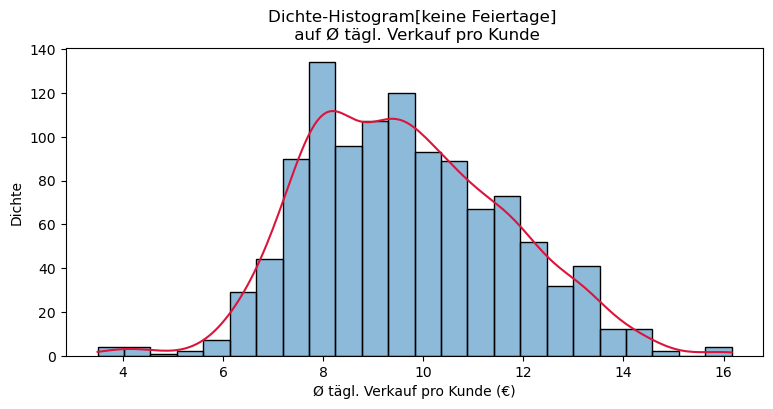

In [57]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(9, 4))
# Histogramm mit aktivierter Dichte anzeigen.
sns.histplot(data=no_holi_df, x='Sales_per_customer', kde=True);
ax.lines[0].set_color('crimson'); # Dichteverlauf in Rot darstellen.
ax.set_title('Dichte-Histogram[keine Feiertage] \n auf Ø tägl. Verkauf pro Kunde');
ax.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');
plt.show();

Bei den Filialen wo keine Feiertage waren, lagen die höchsten Sales per customer bei einem verhältnis zwischen 8 und 10.

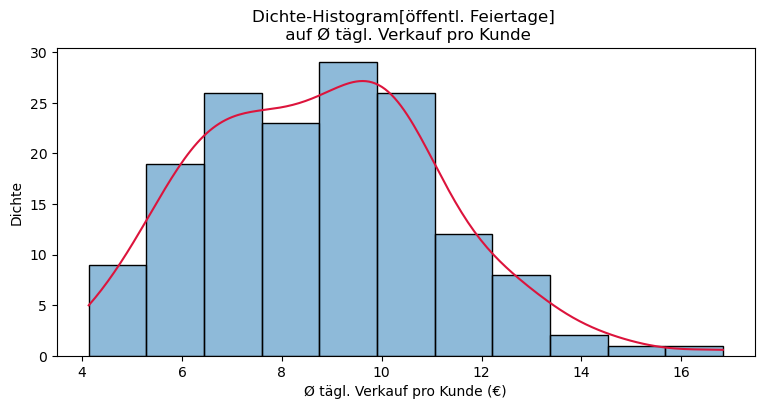

In [58]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(9, 4))
# Histogramm mit aktivierter Dichte anzeigen.
sns.histplot(data=public_df, x='Sales_per_customer', kde=True);
ax.lines[0].set_color('crimson'); # Dichteverlauf in Rot darstellen.
ax.set_title('Dichte-Histogram[öffentl. Feiertage] \n auf Ø tägl. Verkauf pro Kunde');
ax.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');
plt.show();

Bei den öffentlichen Feiertagen war der Sales per customer bei ca. 10 am höchsten.

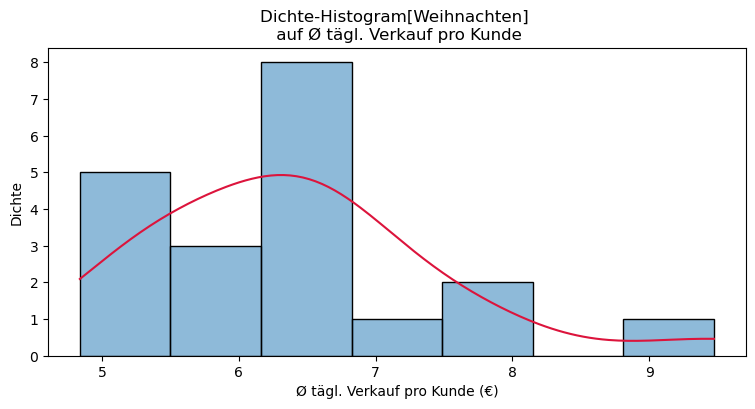

In [59]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(9, 4))
# Histogramm mit aktivierter Dichte anzeigen.
sns.histplot(data=christ_df, x='Sales_per_customer', kde=True);
ax.lines[0].set_color('crimson'); # Dichteverlauf in Rot darstellen.
ax.set_title('Dichte-Histogram[Weihnachten] \n auf Ø tägl. Verkauf pro Kunde');
ax.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');
plt.show();

Bei den Weihnachtstagen ist es normal, dass der Umsatz nicht so groß ist. \
Die meisten Geschenke werden eher vor den Feiertagen eingekauft.

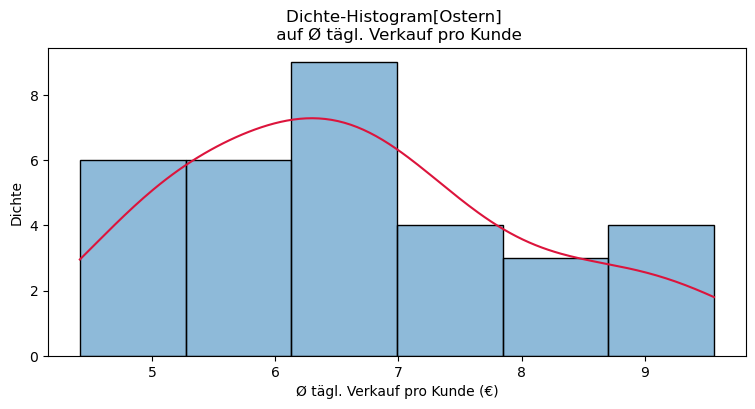

In [60]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(9, 4))
# Histogramm mit aktivierter Dichte anzeigen.
sns.histplot(data=easter_df, x='Sales_per_customer', kde=True);
ax.lines[0].set_color('crimson'); # Dichteverlauf in Rot darstellen.
ax.set_title('Dichte-Histogram[Ostern] \n auf Ø tägl. Verkauf pro Kunde');
ax.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');
plt.show();

Bei Osterfeiertagen verhält es sich ähnlich wie bei Weihnachten.

#### Zusammenfassung der Feiertage:
Beim Diagramm, wo keine Feiertage waren, sah man einen kurzen Ab- und Aufstieg. \
Das könnte ein Indiz dafür sein, dass vor den besonderen Feiertagen wie Weihnachten der Umsatz in dem Zeitraum nochmal ansteigt. \
Während der eigentlichen Feiertage war der Umsatz nicht besonders hoch, weil im Normalfall alle Geschenke vorher schon eingekauft sind.

Betrachtung der **Ferien**.

In [61]:
# Aufteilung der Daten mit aktiven Schulferien und ohne bei Filialen die geöffnet waren.
active_schoolholi_df = train_edit[(train_edit['SchoolHoliday'] == 1)&(train_edit['Open']==1)]
no_active_schoolholi_df = train_edit[(train_edit['SchoolHoliday'] == 0)&(train_edit['Open']==1)]
# Ausgabe wie viele Daten jeweils vertreten sind.
print(f'{len(active_schoolholi_df)} Daten mit Schulferien')
print(f'{len(no_active_schoolholi_df)} Daten ohne Schulferien')

163457 Daten mit Schulferien
680935 Daten ohne Schulferien


In [62]:
# Summenwerte erzeugen.
active_schoolholi_df = active_schoolholi_df.groupby('Store').sum()
no_active_schoolholi_df = no_active_schoolholi_df.groupby('Store').sum()

In [63]:
# Sales per customer erstellen für beide Fälle.
active_schoolholi_df['Sales_per_customer'] = (active_schoolholi_df['Sales'] * active_schoolholi_df['Open'])/(active_schoolholi_df['Customers'] * active_schoolholi_df['Open'])
no_active_schoolholi_df['Sales_per_customer'] = (no_active_schoolholi_df['Sales'] * no_active_schoolholi_df['Open'])/( no_active_schoolholi_df['Customers'] * no_active_schoolholi_df['Open'])

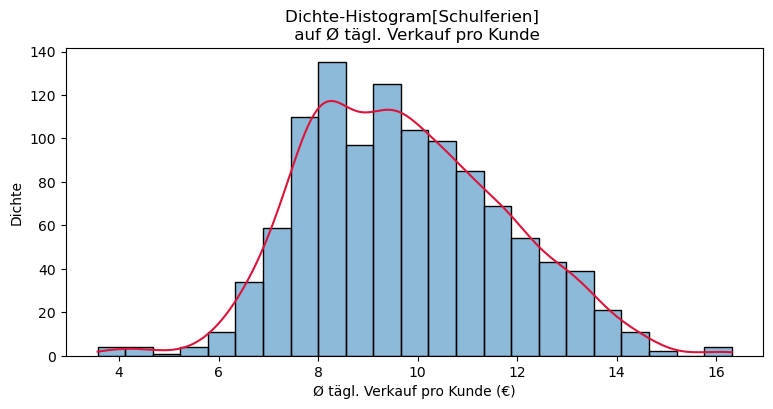

In [64]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(9, 4))
# Histogramm mit aktivierter Dichte anzeigen.
sns.histplot(data=active_schoolholi_df, x='Sales_per_customer', kde=True);
ax.lines[0].set_color('crimson'); # Dichteverlauf in Rot darstellen.
ax.set_title('Dichte-Histogram[Schulferien] \n auf Ø tägl. Verkauf pro Kunde');
ax.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');
plt.show();

Der höchste Verkauf/Kunde liegt zwischen 8 und 10

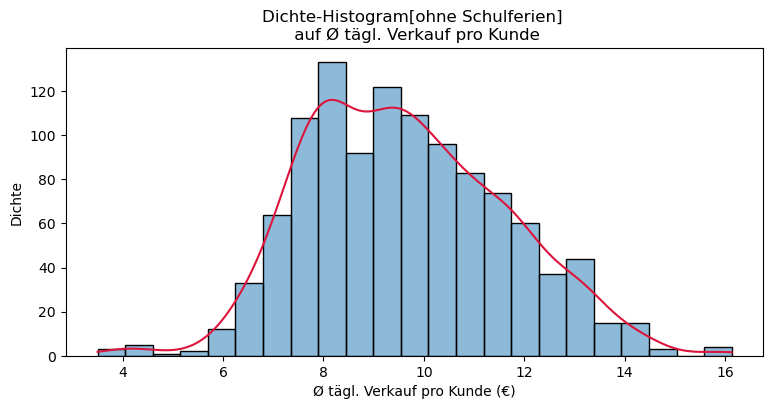

In [65]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(9, 4))
# Histogramm mit aktivierter Dichte anzeigen.
sns.histplot(data=no_active_schoolholi_df, x='Sales_per_customer', kde=True);
ax.lines[0].set_color('crimson'); # Dichteverlauf in Rot darstellen.
ax.set_title('Dichte-Histogram[ohne Schulferien] \n auf Ø tägl. Verkauf pro Kunde');
ax.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');
plt.show();

Der höchste Verkauf/Kunde liegt zwischen 8 und 10

**Zusammenfassung der Ferien:** \
Beide Diagramme zeigen einen fast identischen Verlauf. \
Es zeigt sich kein wesentlicher Unterschied zum Verkauf/Kunde-Verhältnis. 

<a name="232"></a>
#### 2.3.2 Werbeaktionen

Betrachtung der Promo-/Werbeaktionen.
Hier gilt zu beachten, dass es 2 unterschiedliche Werbeaktionen gibt.
* **Total_promo**: Wie viele Tage insgesamt eine Filiale eine Promo hatte.
* **Promo2**: Ob eine Filiale überhaupt an einer wiederkehrenden Werbeaktion teilgenommen hat oder nicht.

In [66]:
# Über die Methode lässt sich sagen, wie viele Tage insgesamt jede Filiale an Werbeaktionen teilgenommen haben.
train_store_df['Total_promo'].value_counts()

Total_promo
360    935
286    180
Name: count, dtype: int64

Somit bilden sich 2 Gruppen: 
* Gruppe-**A**-Filialen: **360** Promotage
* Gruppe-**B**-Filialen: **286** Promotage

Jetzt wäre es interessant zu wissen, wie viele **Promo2** es jeweils in Gruppe A und B gab. \
Durch doppeltes Herausfiltern lassen sich 4 Gruppen bilden, mit den jeweiligen Werbephasen. 

In [67]:
# Daten herausgefiltert, die entweder 360 oder 286 Tage hatten.
group_a = train_store_df.loc[train_store_df['Total_promo'] == 360]
group_b = train_store_df.loc[train_store_df['Total_promo'] == 286]

In [68]:
# Unterteilung der Gruppen wo Dauerpromo´s waren und wo keine.
group_a_promo2 = group_a.loc[group_a['Promo2'] == 1]
group_a_no_promo2 = group_a.loc[group_a['Promo2'] == 0]
group_b_promo2 = group_b.loc[group_b['Promo2'] == 1]
group_b_no_promo2 = group_b.loc[group_b['Promo2'] == 0]

In [69]:
# Ausgabe der Resultate.
print(f'Gruppe A mit: {len(group_a_promo2)} Filialen hatte an Dauer-Promo teilgenommen')
print(f'Gruppe A mit: {len(group_a_no_promo2)} Filialen hatte NICHT an Dauer-Promo teilgenommen')

print(f'Gruppe B mit: {len(group_b_promo2)} Filialen hatte an Dauer-Promo teilgenommen')  
print(f'Gruppe B mit: {len(group_b_no_promo2)} Filialen hatte NICHT an Dauer-Promo teilgenommen') 

Gruppe A mit: 415 Filialen hatte an Dauer-Promo teilgenommen
Gruppe A mit: 520 Filialen hatte NICHT an Dauer-Promo teilgenommen
Gruppe B mit: 156 Filialen hatte an Dauer-Promo teilgenommen
Gruppe B mit: 24 Filialen hatte NICHT an Dauer-Promo teilgenommen


Man erkennt, dass in **Gruppe A** die Teilnahme an Dauerwerbeaktionen bei ca. **44,4 %** lag,
wohingegen in **Gruppe B** die Teilnahme bei ca. **87 %**.

Abhängig davon könnte man nun prüfen, wie das Verkauf/Kunden-Verhältnis bei den jeweiligen Gruppen lag. \
Hierzu werden 4 Dichte-Histogramme erstellt (A und B mit und ohne Dauerwerbung). 

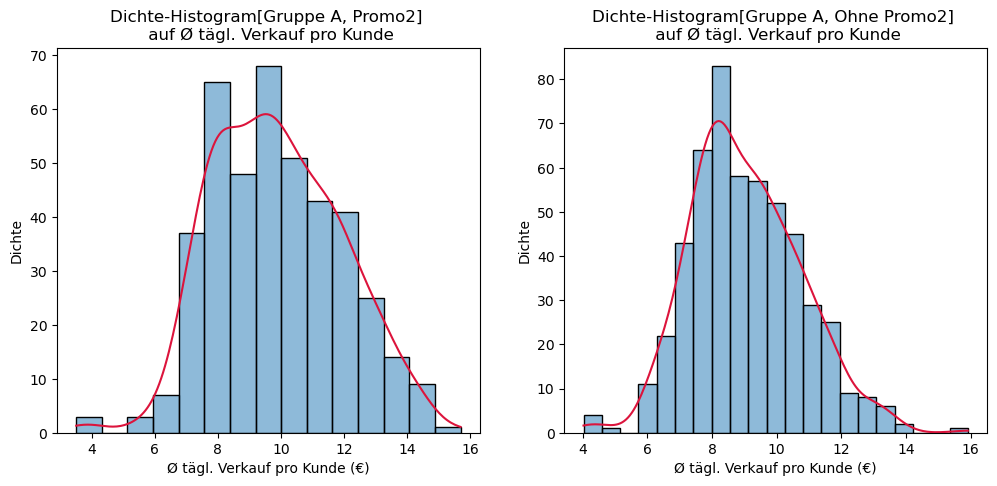

In [70]:
# Erstellen eines Subplots 1 Reihe mit 2 Spalten.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Histogramm mit aktivierter Dichte anzeigen.
sns.histplot(x=group_a_promo2['Sales_per_customer'],kde=True, ax=ax1);
ax1.lines[0].set_color('crimson'); # Dichteverlauf in Rot darstellen.
ax1.set_title('Dichte-Histogram[Gruppe A, Promo2] \n auf Ø tägl. Verkauf pro Kunde');
ax1.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');

# Gleiches Vorgehen beim 2.Diagramm.
sns.histplot(x=group_a_no_promo2['Sales_per_customer'],kde=True, ax=ax2);
ax2.lines[0].set_color('crimson');
ax2.set_title('Dichte-Histogram[Gruppe A, Ohne Promo2] \n auf Ø tägl. Verkauf pro Kunde');
ax2.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');

plt.show();

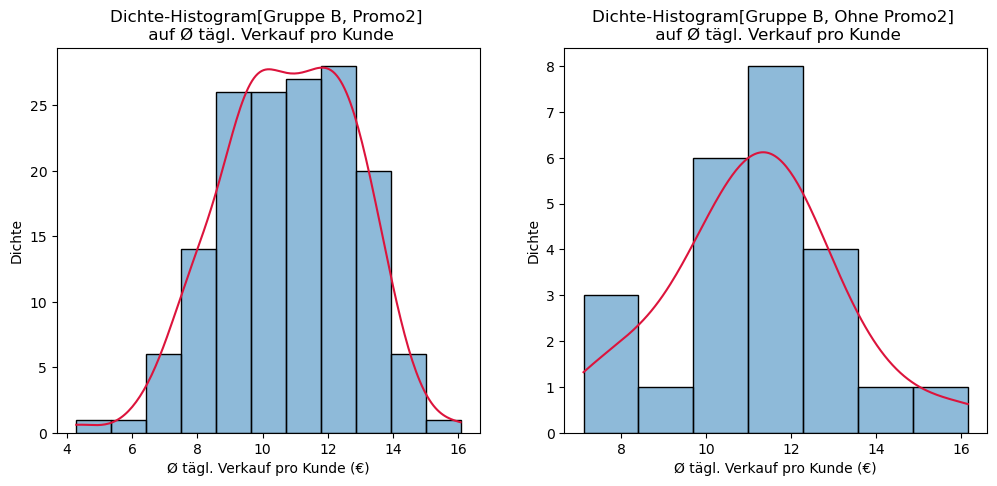

In [71]:
# Erstellen eines Subplots 1 Reihe mit 2 Spalten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# Histogramm mit aktivierter Dichte anzeigen
sns.histplot(x=group_b_promo2['Sales_per_customer'], kde=True, ax=ax1);
ax1.lines[0].set_color('crimson');
ax1.set_title('Dichte-Histogram[Gruppe B, Promo2] \n auf Ø tägl. Verkauf pro Kunde');
ax1.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');

sns.histplot(x=group_b_no_promo2['Sales_per_customer'], kde=True, ax=ax2);
ax2.lines[0].set_color('crimson');
ax2.set_title('Dichte-Histogram[Gruppe B, Ohne Promo2] \n auf Ø tägl. Verkauf pro Kunde');
ax2.set(xlabel = 'Ø tägl. Verkauf pro Kunde (€)', ylabel = 'Dichte');

plt.show();

Betrachtung der Werbeintervalle **PromoInterval**: \
Da sich gezeigt hat, dass Dauerwerbeaktionen eine positive Auswirkung auf den Umsatz haben, wird das Intervall nochmal näher betrachtet. \
PromoInterval: 0 = (Jan,Apr,Jul,Oct), 1 = (Feb,May,Aug,Nov), 2 = (Mar,Jun,Sept,Dec)

In [72]:
# Erstellung einer Gruppe, wo ausschließlich Dauerwerbeaktionen liefen. 
promo2_group = train_store_df.loc[train_store_df['Promo2'] == 1]

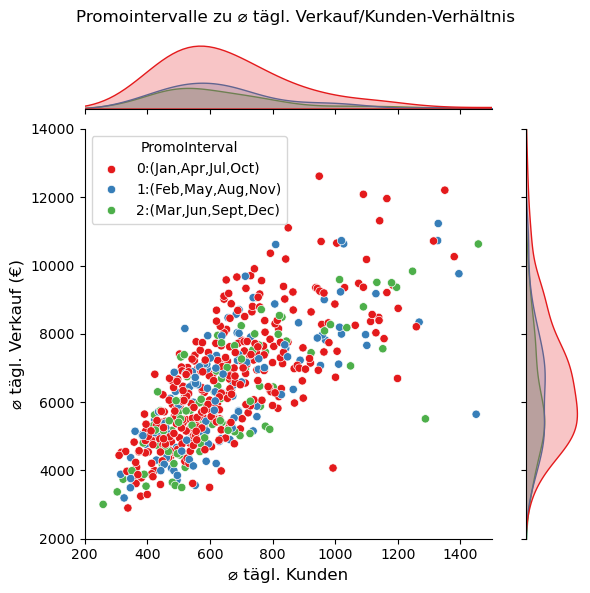

In [73]:
# Bezeichnung der Legende.
hue_label = ['0:(Jan,Apr,Jul,Oct)', '1:(Feb,May,Aug,Nov)', '2:(Mar,Jun,Sept,Dec)']

# Streudiagramm mit Dichte der Promointervalle bezüglich durchschn. tägl. Verkauf und Kunde.
# Zusätzliches Umbenennen der Promointervalle über eine Aufzählung für bessere Darstellung.
j = sns.jointplot(data = promo2_group.replace({"PromoInterval": {i: label for i, label in enumerate(hue_label)}}), 
                  hue="PromoInterval", palette="Set1", x = 'Mean_daily_customers', y = 'Mean_daily_sales', height=6, ratio=5);

# Titel
plt.suptitle('Promointervalle zu ⌀ tägl. Verkauf/Kunden-Verhältnis');
# Bezeichnung für die X und Y-Achsen.
j.set_axis_labels('⌀ tägl. Kunden', '⌀ tägl. Verkauf (€)', fontsize=12);

# Abstandsanpassung
plt.tight_layout()

# Anpassung der Reichweite der X,Y-Achse.
plt.xlim(200, 1500)
plt.ylim(2000, 14000)
plt.show();

In [74]:
promo2_group['PromoInterval'].value_counts() # Betrachtung der Filialanzahl an jeweiligen Intervallen.

PromoInterval
0    335
1    130
2    106
Name: count, dtype: int64

Es ist deutlich zu erkennen, dass **Intervall 0 (335 Filialen)** die höchste Dichte besitzt. \
**Intervall 1 (130 Filialen)** und **Intervall 2 (106 Filialen)** zeigen eine ähnlich große Dichte. \
**Intervall 2** hat den niedrigsten Verkauf-Peak (ca. 5000 €) und niedrigsten Kunden-Peak (ca. 500). \
**Intervall 1** hat den höchsten Verkauf-Peak (ca. 7000 €) und eine Kunden-Peak bei (ca. 550). \
Das beste Verkauf/Kunden-Verhältnis erzielt **Intervall 1**, gefolgt von **Intervall 2** und zum Schluss **Intervall 0**.

#### Zusammenfassung der Dauerwerbeaktionen:
Betrachtet man Gruppe A und Gruppe B die jeweils an längeren Werbeaktionen teilgenommen haben, fällt auf, 
dass Gruppe B bessere Umsatz/Kunden erzielt als Gruppe A. \
Obwohl Gruppe A mit Dauerwerbeaktionen 415 Filialen besitzt und Gruppe B nur 156. \
Ähnlich verhält es sich zu den beiden Gruppen ohne längere Werbeaktionen. \
Aus den Diagrammen geht hervor, dass Dauerwerbeaktionen zu einer Verbesserung des Verkauf/Kunden-Verhältnisses beitragen. \
Die Werbeintervalle zeigen, dass Intervall 0 am häufigsten vertreten ist, aber das schlechteste Verhältnis zu Verkauf/Kunde hat. \
Intervall 1 hat das beste Verkauf/Kunden-Verhältnis, gefolgt von Intervall 2.

<a name="233"></a>
#### 2.3.3 Konkurrenzdistanz, Sortiment und Ladenmodell 

Ein weiterer wichtiger Aspekt wäre die Entfernung zum nächstgelegenen Konkurrenzgeschäft. \
Hierbei wird zusätzlich der Sortimentsgrad **Assortment** und das Ladenmodell **StoreType** mitbetrachtet. 

Gruppe A **mit** Dauerwerbeaktion:

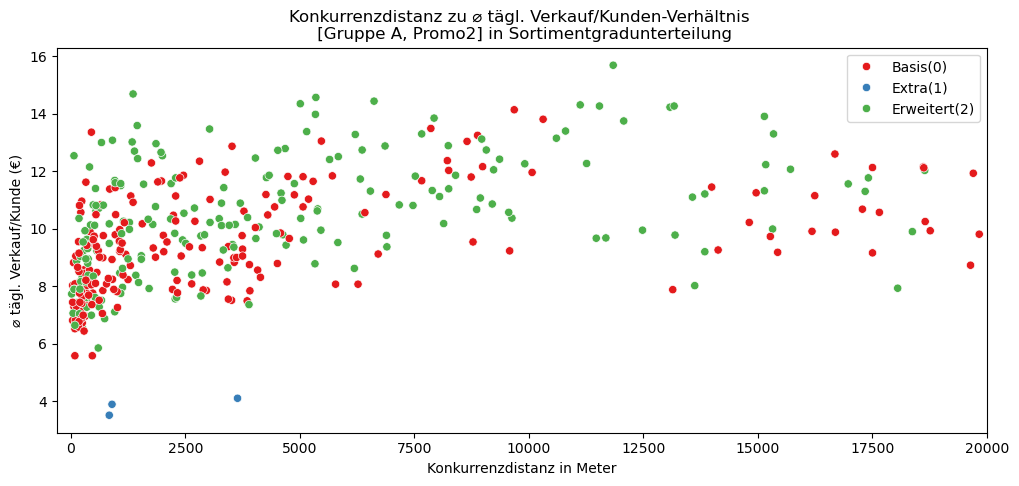

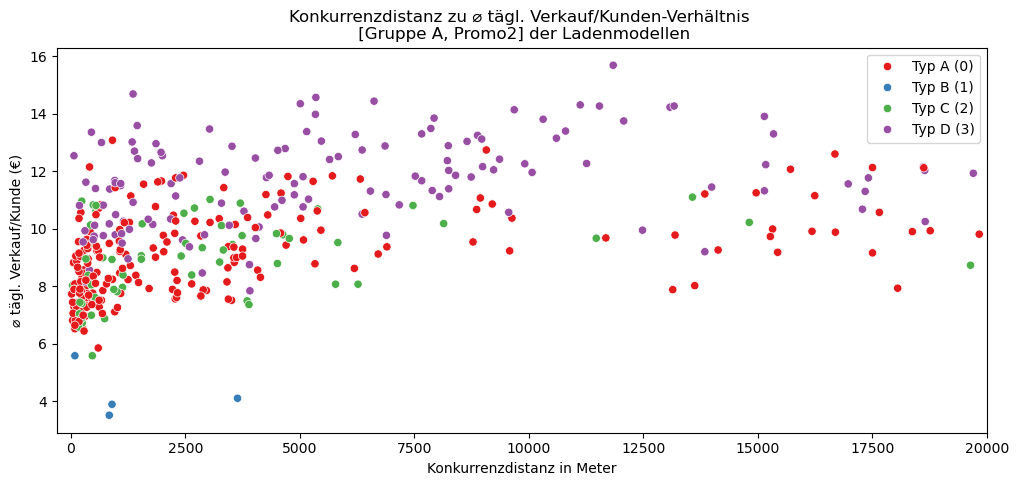

In [75]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(12, 5))
# Streudiagramm bezüglich Konkurrenzdistanz und Verkauf/Kunden-Verhältnis mit Differenzierung zum Sortiment.
sns.scatterplot(ax=ax, data = group_a_promo2, hue="Assortment", palette="Set1",
                x = 'CompetitionDistance', y = 'Sales_per_customer');
# Titelüberschrift.
ax.set_title('Konkurrenzdistanz zu ⌀ tägl. Verkauf/Kunden-Verhältnis \n [Gruppe A, Promo2] in Sortimentgradunterteilung');
# Bezeichnung für die X und Y-Achsen.
ax.set(xlabel='Konkurrenzdistanz in Meter', ylabel='⌀ tägl. Verkauf/Kunde (€)');
# Rückgabe der Beschriftung und der Legenden mit angepasster Bezeichnung.
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Basis(0)', 'Extra(1)', 'Erweitert(2)'])
plt.xlim(-300, 20000)
plt.show();

fig, ax = plt.subplots(figsize=(12, 5))
# Streudiagramm bezüglich Konkurrenzdistanz und Verkauf/Kunden-Verhältnis der Ladenmodellen.
sns.scatterplot(ax=ax, data = group_a_promo2, hue="StoreType", palette="Set1",
                x = 'CompetitionDistance', y = 'Sales_per_customer');
# Titelüberschrift.
ax.set_title('Konkurrenzdistanz zu ⌀ tägl. Verkauf/Kunden-Verhältnis \n [Gruppe A, Promo2] der Ladenmodellen');
# Bezeichnung für die X und Y-Achsen.
ax.set(xlabel='Konkurrenzdistanz in Meter', ylabel='⌀ tägl. Verkauf/Kunde (€)');
# Rückgabe der Beschriftung und der Legenden mit angepasster Bezeichnung.
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Typ A (0)', 'Typ B (1)', 'Typ C (2)', 'Typ D (3)'])
plt.xlim(-300, 20000)
plt.show();

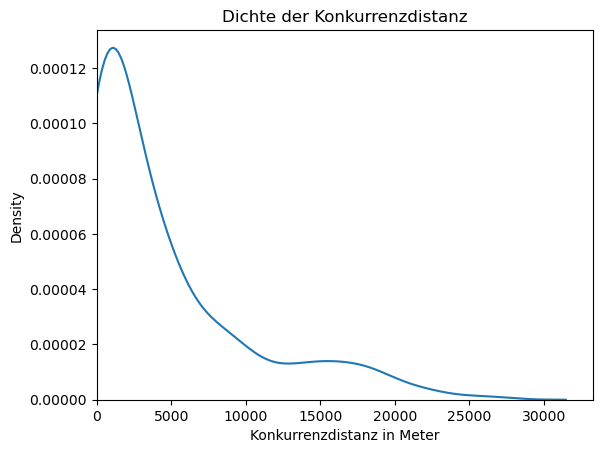

x    1071.819447
y       0.000127
Name: 33, dtype: float64

In [76]:
# Betrachtung der Dichteverteilung der Konkurrenzdistanz.
dens = sns.kdeplot(x=group_a_promo2['CompetitionDistance']);
plt.title('Dichte der Konkurrenzdistanz');
plt.xlabel('Konkurrenzdistanz in Meter');
plt.xlim(0); # Start des Plots bei 0 Metern
plt.show();
# Achsenwerte übergeben. 
x, y = dens.lines[0].get_data()
# Erstellung eines Dataframes mit den entsprechenden Achsenwerten.
df = pd.DataFrame({'x':x, 'y':y})
# Den maximalen Dichtewert ermitteln mit der entsprechenden Distanz.
df.loc[df['y'].idxmax()]

Bei Gruppe A mit Dauerwerbeaktion liegt die Spitzendichte der Filialen im Bereich etwa 1100 m zur Konkurrenz. \
Danach nimmt diese signifikant ab. \
Es sind überwiegen Basis und Erweitere-Produkte die in den meisten Filialen vertreten. \

Gruppe A **ohne** Dauerwerbeaktion:

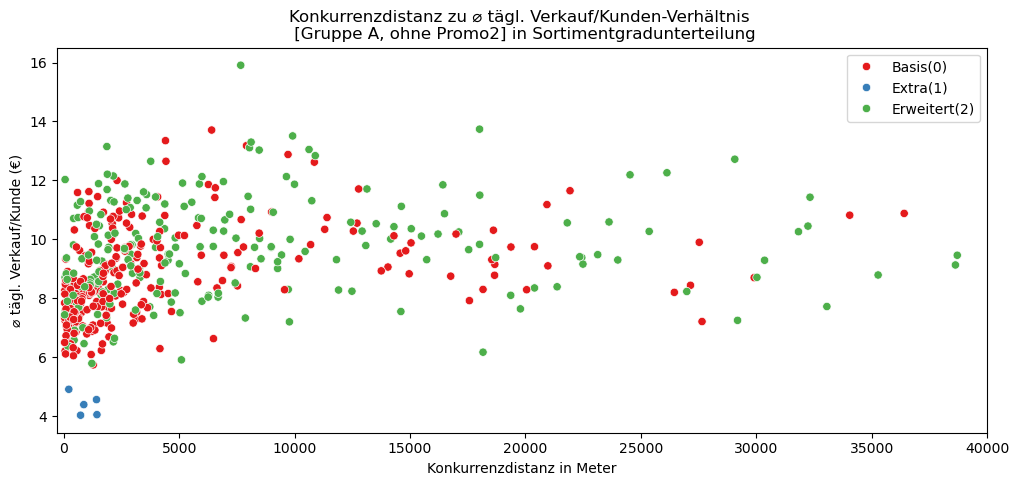

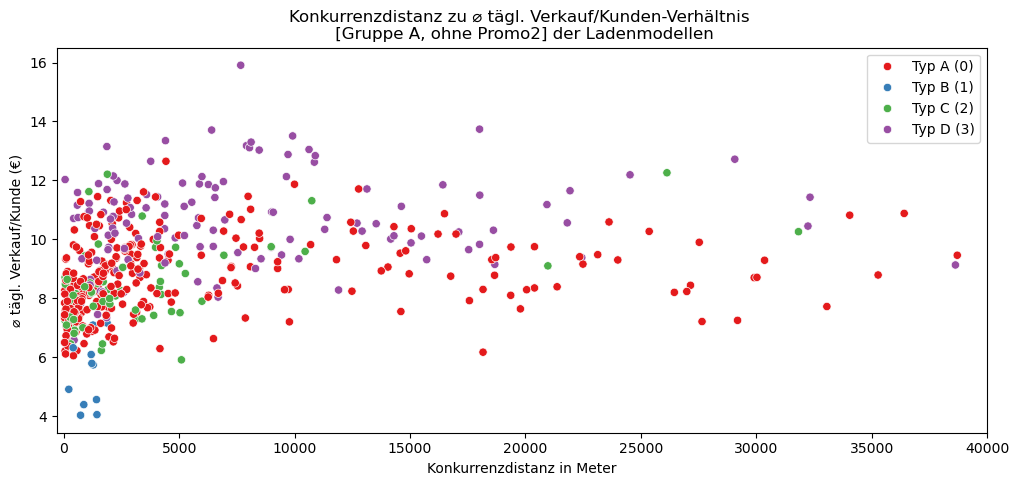

In [77]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(12, 5))
# Streudiagramm bezüglich Konkurrenzdistanz und Verkauf/Kunden-Verhältnis mit Differenzierung zum Sortiment.
sns.scatterplot(ax=ax, data = group_a_no_promo2, hue="Assortment", palette="Set1",
                x = 'CompetitionDistance', y = 'Sales_per_customer');
# Titelüberschrift.
ax.set_title('Konkurrenzdistanz zu ⌀ tägl. Verkauf/Kunden-Verhältnis \n [Gruppe A, ohne Promo2] in Sortimentgradunterteilung');
# Bezeichnung für die X und Y-Achsen.
ax.set(xlabel='Konkurrenzdistanz in Meter', ylabel='⌀ tägl. Verkauf/Kunde (€)');
# Rückgabe der Beschriftung und der Legenden mit angepasster Bezeichnung.
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Basis(0)', 'Extra(1)', 'Erweitert(2)'])
plt.xlim(-300, 40000)
plt.show();

fig, ax = plt.subplots(figsize=(12, 5))
# Streudiagramm bezüglich Konkurrenzdistanz und Verkauf/Kunden-Verhältnis der Ladenmodellen.
sns.scatterplot(ax=ax, data = group_a_no_promo2, hue="StoreType", palette="Set1",
                x = 'CompetitionDistance', y = 'Sales_per_customer');
# Titelüberschrift.
ax.set_title('Konkurrenzdistanz zu ⌀ tägl. Verkauf/Kunden-Verhältnis \n [Gruppe A, ohne Promo2] der Ladenmodellen');
# Bezeichnung für die X und Y-Achsen.
ax.set(xlabel='Konkurrenzdistanz in Meter', ylabel='⌀ tägl. Verkauf/Kunde (€)');
# Rückgabe der Beschriftung und der Legenden mit angepasster Bezeichnung.
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Typ A (0)', 'Typ B (1)', 'Typ C (2)', 'Typ D (3)'])
plt.xlim(-300, 40000)
plt.show();

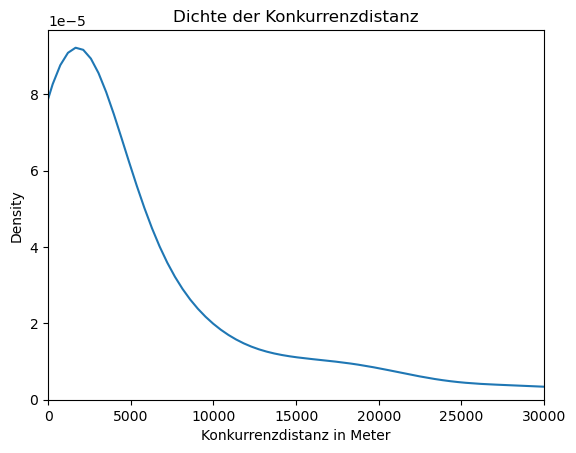

x    1659.109501
y       0.000092
Name: 21, dtype: float64

In [78]:
# Betrachtung der Dichteverteilung der Konkurrenzdistanz.
dens = sns.kdeplot(x=group_a_no_promo2['CompetitionDistance']);
plt.title('Dichte der Konkurrenzdistanz');
plt.xlabel('Konkurrenzdistanz in Meter');
plt.xlim(0, 30000); # Start des Plots bei 0 Metern
plt.show();
# Achsenwerte übergeben. 
x, y = dens.lines[0].get_data()
# Erstellung eines Dataframes mit den entsprechenden Achsenwerten.
df = pd.DataFrame({'x':x, 'y':y})
# Den maximalen Dichtewert ermitteln mit der entsprechenden Distanz.
df.loc[df['y'].idxmax()]

Ähnlicher Verlauf wie in Gruppe A mit Dauerwerbeaktion, nur das hier die Dichte deutlich stärker ist und 
über eine weitere Konkurrenzdistanz (ca.5 km) liegt. \
Die Spitzendichte liegt hier bei etwa 1700 m. \
Das Verkauf/Kunden-Verhältnis nimmt ab 5 km immer weiter ab. 

Gruppe B **mit** Dauerwerbeaktion:

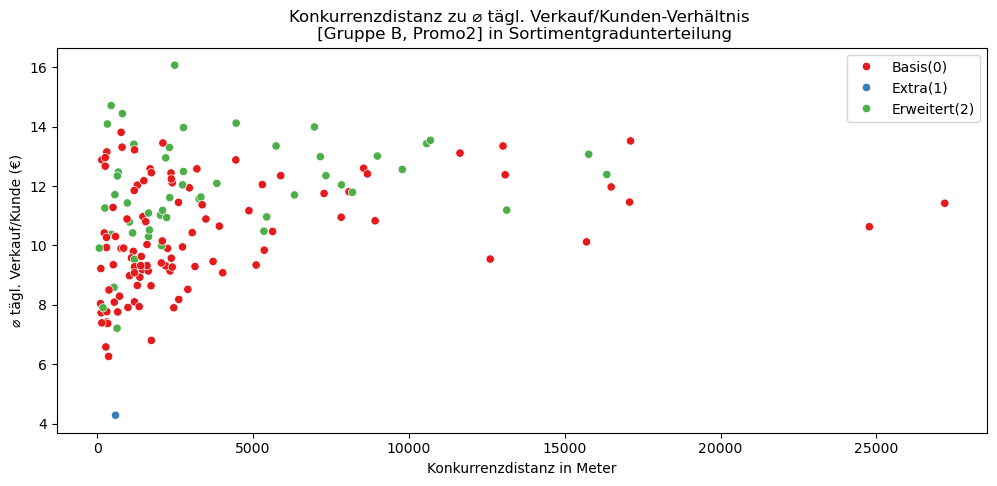

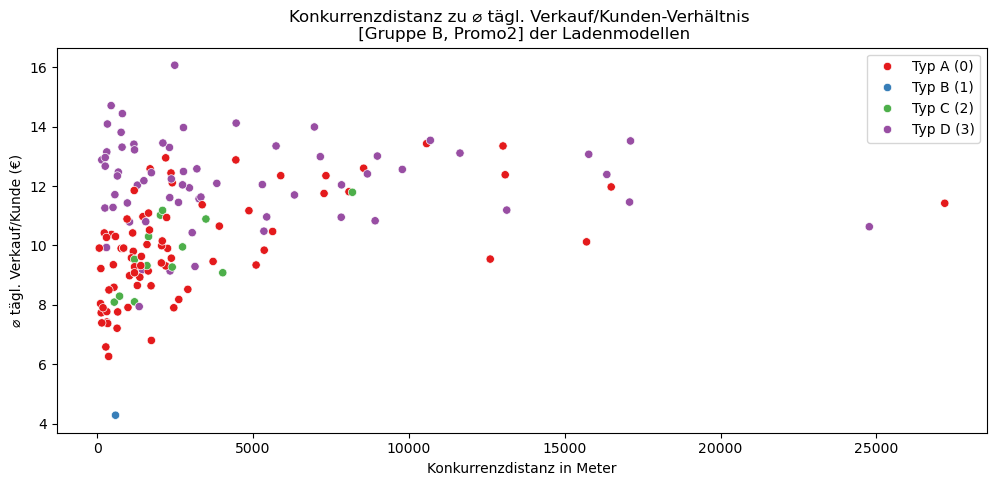

In [79]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(12, 5))
# Streudiagramm bezüglich Konkurrenzdistanz und Verkauf/Kunden-Verhältnis mit Differenzierung zum Sortiment.
sns.scatterplot(ax=ax, data = group_b_promo2, hue="Assortment", palette="Set1",
                x = 'CompetitionDistance', y = 'Sales_per_customer');
# Titelüberschrift.
ax.set_title('Konkurrenzdistanz zu ⌀ tägl. Verkauf/Kunden-Verhältnis \n [Gruppe B, Promo2] in Sortimentgradunterteilung');
# Bezeichnung für die X und Y-Achsen.
ax.set(xlabel='Konkurrenzdistanz in Meter', ylabel='⌀ tägl. Verkauf/Kunde (€)');
# Rückgabe der Beschriftung und der Legenden mit angepasster Bezeichnung.
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Basis(0)', 'Extra(1)', 'Erweitert(2)'])
plt.show();

fig, ax = plt.subplots(figsize=(12, 5))
# Streudiagramm bezüglich Konkurrenzdistanz und Verkauf/Kunden-Verhältnis der Ladenmodellen.
sns.scatterplot(ax=ax, data = group_b_promo2, hue="StoreType", palette="Set1",
                x = 'CompetitionDistance', y = 'Sales_per_customer');
# Titelüberschrift.
ax.set_title('Konkurrenzdistanz zu ⌀ tägl. Verkauf/Kunden-Verhältnis \n [Gruppe B, Promo2] der Ladenmodellen');
# Bezeichnung für die X und Y-Achsen.
ax.set(xlabel='Konkurrenzdistanz in Meter', ylabel='⌀ tägl. Verkauf/Kunde (€)');
# Rückgabe der Beschriftung und der Legenden mit angepasster Bezeichnung.
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Typ A (0)', 'Typ B (1)', 'Typ C (2)', 'Typ D (3)'])
plt.show();

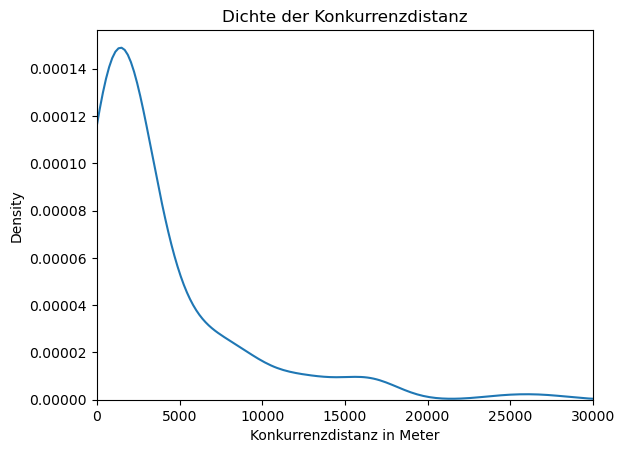

x    1492.463712
y       0.000149
Name: 35, dtype: float64

In [80]:
# Betrachtung der Dichteverteilung der Konkurrenzdistanz.
dens = sns.kdeplot(x=group_b_promo2['CompetitionDistance']);
plt.title('Dichte der Konkurrenzdistanz');
plt.xlabel('Konkurrenzdistanz in Meter');
plt.xlim(0, 30000); # Start des Plots bei 0 Metern
plt.show();
# Achsenwerte übergeben. 
x, y = dens.lines[0].get_data()
# Erstellung eines Dataframes mit den entsprechenden Achsenwerten.
df = pd.DataFrame({'x':x, 'y':y})
# Den maximalen Dichtewert ermitteln mit der entsprechenden Distanz.
df.loc[df['y'].idxmax()]

Für Gruppe B mit Dauerwerbeaktion bei etwa 1500 m höchste Dichte, anschließend stark nachlassend. \
Bei geringerer Konkurrenzdistanz, höheres Verkauf/Kunden-Verhältnis als im Vergleich zu Gruppe A mit Dauerwerbeaktion. 

Gruppe B **ohne** Dauerwerbeaktion:

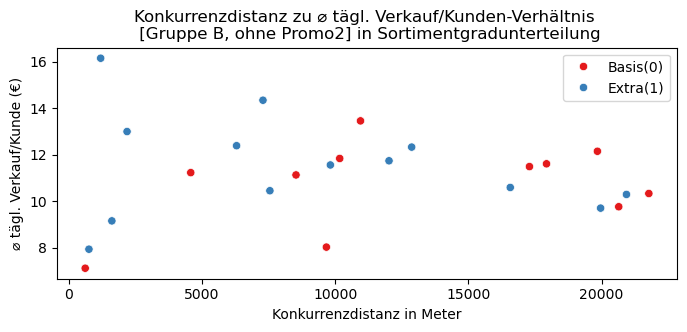

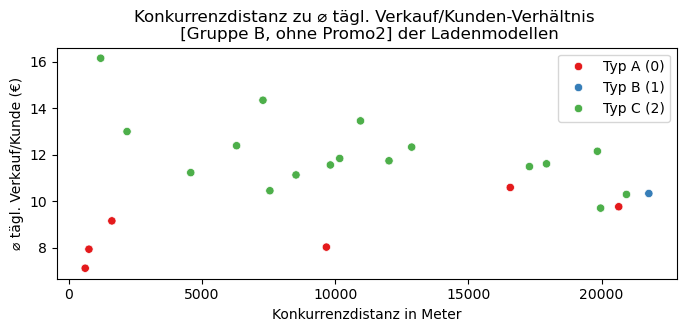

In [81]:
# Plot auf Höhe und Breite angepasst für bessere Übersicht.
fig, ax = plt.subplots(figsize=(8, 3))
# Streudiagramm bezüglich Konkurrenzdistanz und Verkauf/Kunden-Verhältnis mit Differenzierung zum Sortiment.
sns.scatterplot(ax=ax, data = group_b_no_promo2, hue="Assortment", palette="Set1",
                x = 'CompetitionDistance', y = 'Sales_per_customer');
# Titelüberschrift
ax.set_title('Konkurrenzdistanz zu ⌀ tägl. Verkauf/Kunden-Verhältnis \n [Gruppe B, ohne Promo2] in Sortimentgradunterteilung');
# Bezeichnung für die X und Y-Achsen.
ax.set(xlabel='Konkurrenzdistanz in Meter', ylabel='⌀ tägl. Verkauf/Kunde (€)');
# Rückgabe der Beschriftung und der Legenden mit angepasster Bezeichnung.
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Basis(0)', 'Extra(1)', 'Erweitert(2)'])
plt.show();

fig, ax = plt.subplots(figsize=(8, 3))
# Streudiagramm bezüglich Konkurrenzdistanz und Verkauf/Kunden-Verhältnis der Ladenmodellen.
sns.scatterplot(ax=ax, data = group_b_no_promo2, hue="StoreType", palette="Set1",
                x = 'CompetitionDistance', y = 'Sales_per_customer');
# Titelüberschrift
ax.set_title('Konkurrenzdistanz zu ⌀ tägl. Verkauf/Kunden-Verhältnis \n [Gruppe B, ohne Promo2] der Ladenmodellen');
# Bezeichnung für die X und Y-Achsen.
ax.set(xlabel='Konkurrenzdistanz in Meter', ylabel='⌀ tägl. Verkauf/Kunde (€)');
# Rückgabe der Beschriftung und der Legenden mit angepasster Bezeichnung.
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Typ A (0)', 'Typ B (1)', 'Typ C (2)', 'Typ D (3)'])
plt.show();

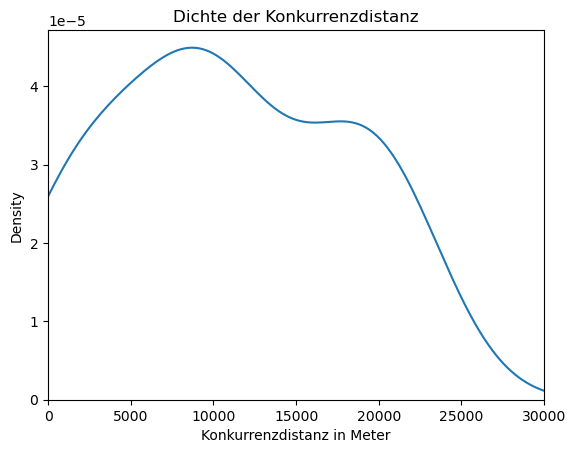

x    8667.562700
y       0.000045
Name: 88, dtype: float64

In [82]:
# Betrachtung der Dichteverteilung der Konkurrenzdistanz.
dens = sns.kdeplot(x=group_b_no_promo2['CompetitionDistance']);
plt.title('Dichte der Konkurrenzdistanz');
plt.xlabel('Konkurrenzdistanz in Meter');
plt.xlim(0, 30000); # Start des Plots bei 0 Metern
plt.show();
# Achsenwerte übergeben. 
x, y = dens.lines[0].get_data()
# Erstellung eines Dataframes mit den entsprechenden Achsenwerten.
df = pd.DataFrame({'x':x, 'y':y})
# Den maximalen Dichtewert ermitteln mit der entsprechenden Distanz.
df.loc[df['y'].idxmax()]

Gruppe B ohne Dauerwerbeaktion bisher einzige ohne erweitertes Sortiment. \
Die Tendenz bei längeren Konkurrenzdistanzen ist ein schlechteres Umsatzverhältnis. \
Da die Gruppe aus nur 24 Filialen besteht, wiegen die Ladenmodelle nicht besonders stark im Vergleich zum Rest. \
Die höchste Dichte liegt hier auch bei ca. 8700 m und ist somit nicht besonders aussagekräftig.

#### Zusammenfassung der Sortimente und Ladenmodelle:
Sortiment: \
**Basis** und **Erweitert** ist am meisten vertreten. **Extra** ist vernachlässigbar. \
Basis hat bei geringerer Konkurrenzentfernung eine höhere Dichte als **Erweitert**, aber ein etwas schlechteres Verkauf/Kunden-Verhältnis. \
**Erweitert** hat eine geringfügige Filialdichte als Basis, aber ein stärkeres Verkauf/Kunden-Verhältnis. 

**Ladenmodelle:** \
Die Ladenmodelle **A** haben die höchste Filialdichte und das 2. beste Verkauf/Kunden-Verhältnis. \
Die Ladenmodelle **B** schneiden am schlechtesten in beiden Kategorien ab. \
Die Ladenmodelle **C** haben eine schlechtere Filialendichte und Verkauf/Kunden-Verhältnis als A. \
Die Ladenmodelle **D** haben eine schlechtere Filialendichte als A aber das stärkste Verkauf/Kunden-Verhältnis. \
Die wichtigsten Modelle wären hier **A** und **D**. 

**Zwischenfazit:** In Ballungsräumen, wo viele Konkurrenzfilialen vorhanden sind, wird der stärkste Umsatz pro Kunde generiert (bis ca. 2000 m). \
Man sollte sich überwiegend auf Filialen vom Typ D und A fokussieren, die überwiegend Erweitertes- und Basis-Sortiment anbieten. \
Im Idealfall: **Typ D** und **Erweitert**.

<a name="3"></a>
## 3. Leistungsbericht

<a name="31"></a>
### 3.1 Gesamtbericht aller Filialen

In [83]:
train_store_df.head()

,Total_sales,Total_customers,Total_open,Total_promo,Total_SchoolHoliday,Total_no_holi,Total_public_holi,Total_easter,Total_christmas,Total_mon,Total_tue,Total_wed,Total_thu,Total_fri,Total_sat,Total_sun,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Mean_daily_sales,Mean_daily_customers,Sales_per_customer
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3716854,440523,781,360,193,915,17,6,4,134,135,135,135,135,134,134,2,0,1270,9,2008,0,0,0,0,4759.10,564.0,8.44
2,3883858,457855,784,360,167,917,15,6,4,134,135,135,135,135,134,134,0,0,570,11,2007,1,13,2010,0,4953.90,584.0,8.48
3,5408261,584310,779,360,170,913,19,6,4,134,135,135,135,135,134,134,0,0,14130,12,2006,1,14,2011,0,6942.57,750.0,9.26
4,7556507,1036254,784,360,173,918,14,6,4,134,135,135,135,135,134,134,2,2,620,9,2009,0,0,0,0,9638.40,1322.0,7.29
5,3642818,418588,779,360,172,911,21,6,4,134,135,135,135,135,134,134,0,0,29910,4,2015,0,0,0,0,4676.27,537.0,8.70


Um die Gesamtbewertung aller Filialen einschätzen zu können, 
wird dafür ein Gesamtbericht zur Performance aller Rossmann-Filialen für das Management-Team erstellt. \
Ausschlaggebend ist der Wert **Sales_per_customer** der jeweiligen Filiale. \
Je höher, desto besser das Verhältnis zwischen Verkäufen pro Kunden. \
Durch die Erstellung einer Funktion soll es möglich sein, den Bericht erzeugen zu können.

In [84]:
# Erstellung einer Funktion für den Gesammtbericht.
def total_store_report():
    from IPython.display import Markdown as md # Import das Modul Markdown um die Ausgaben als Markdown-Text auszugeben.
    display(md(" ## Gesamtbericht aller Filialen")) # Überschrift

    # Ermittlung des durchschn. Gesamtumsatzes. 
    mean_total_sales = (train_store_df['Mean_daily_sales'] * train_store_df['Total_open']).sum()
    
    # Ausgabe der jeweiligen Variablen.
    # Ermittlung der Summe aus den durchsch. Werten und dem Sales/Customer-Verhältnis.
    display(md(" #### Summe aller Filialen: **{}**".format(len(train_store_df))))
    display(md(" #### Summe des durchschnittlichen Gesamtumsatzes lag bei: **{:,.0f}** Euro.".format(mean_total_sales)))
    display(md(" #### Die Summe der durchschnittlich täglichen Verkäufe bei allen Filialen lag bei: **{:,}** Euro.".format(train_store_df['Mean_daily_sales'].sum())))
    display(md(" #### Die Summe der durchschnittlich täglichen Kunden bei allen Filialen lag bei: **{:,}.**".format(train_store_df['Mean_daily_customers'].sum().astype(int))))
    display(md(" #### Die Summe der Verkäufe pro Kunden bei allen Filialen lag bei: **{:,}** €/Kunde.".format(train_store_df['Sales_per_customer'].sum())))
    display(md(" <br />")) # break tag für neuen Absatz.

    # Die unterschiedlichen Werte in Variablen übergeben.
    promo = train_store_df['Total_promo'].value_counts() 
    promo2 = train_store_df['Promo2'].value_counts() 
    stores = train_store_df['StoreType'].value_counts() 
    assort = train_store_df['Assortment'].value_counts()
    
    display(md(" ### Gesamttage an denen eine Werbeaktion in den Filialen liefen:"))
    display(promo.to_frame().T) # Die Serie in Dataframe umwandeln, transposen(Spalten mit Zeilen vertauschen) und anzeigen.
    plt.figure(figsize=(3,3)) # Plotgröße anpassen.
    promo.plot(kind='pie', autopct='%1.1f%%', ); # Kuchendiagramm erzeugen mit % Anzeige.
    
    plt.show();
    
    display(md(" ### Filialen bei denen Promo-Phasen liefen:"))
    display(promo2.to_frame().T) # Die Serie in Dataframe umwandeln und anzeigen.
    plt.figure(figsize=(3,3)) # Plotgröße anpassen.
    promo2.plot(kind='pie', autopct='%1.1f%%'); # Kuchendiagramm erzeugen mit % Anzeige.
    plt.show();
    
    display(md(" ### Anzahl der Filialtypen:"))  
    display(stores.to_frame().T) # die Serie in Dataframe umwandeln und anzeigen.
    # Kuchendiagramm erzeugen mit % Anzeige. 
    plt.figure(figsize=(3,3)) # Plotgröße anpassen.
    stores.plot(labels=['Typ a(0)' , 'Typ d(3)', 'Typ c(2)', 'Typ b(1)'],kind='pie', autopct='%1.1f%%'); 
    plt.show();
    
    display(md(" ### Anzahl der unterschiedlichen Sortimente:"))
    display(assort.to_frame().T)
    plt.figure(figsize=(3,3)) # Plotgröße anpassen.
    assort.plot(labels=['a(0) = Basis' , 'c(2) = Erweitert', 'b(1) = Extra'],kind='pie', autopct='%1.1f%%');
    plt.show();    

    display(md(" ### Aus der EDA:"))
    display(md(" #### Wiederkehrende Werbeaktionen führen zu besseren Umsätzen."))
    display(md(" #### In Ballungsräumen, wo viele Konkurrenzfilialen vorhanden sind, wird der stärkste Umsatz pro Kunde generiert (bis ca. 2 km)."))
    display(md(" #### Man sollte sich überwiegend auf Filialen vom Typ D und A konzentrieren, die überwiegend ein erweitertes und ein Basissortiment anbieten."))
    display(md(" #### Stärkerer Fokus wäre hier Typ D und erweitertes Sortiment."))

 ## Gesamtbericht aller Filialen

 #### Summe aller Filialen: **1115**

 #### Summe des durchschnittlichen Gesamtumsatzes lag bei: **5,873,180,676** Euro.

 #### Die Summe der durchschnittlich täglichen Verkäufe bei allen Filialen lag bei: **7,731,642.49** Euro.

 #### Die Summe der durchschnittlich täglichen Kunden bei allen Filialen lag bei: **841,274.**

 #### Die Summe der Verkäufe pro Kunden bei allen Filialen lag bei: **10,752.68** €/Kunde.

 <br />

 ### Gesamttage an denen eine Werbeaktion in den Filialen liefen:

Total_promo,360,286
count,935,180


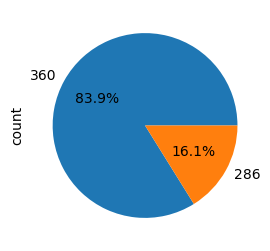

 ### Filialen bei denen Promo-Phasen liefen:

Promo2,1,0
count,571,544


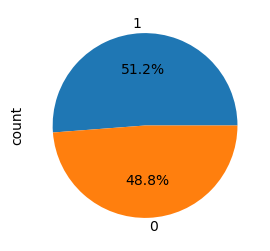

 ### Anzahl der Filialtypen:

StoreType,0,3,2,1
count,602,348,148,17


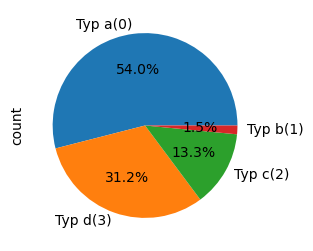

 ### Anzahl der unterschiedlichen Sortimente:

Assortment,0,2,1
count,593,513,9


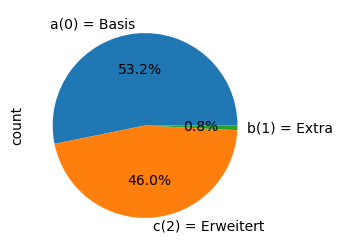

 ### Aus der EDA:

 #### Wiederkehrende Werbeaktionen führen zu besseren Umsätzen.

 #### In Ballungsräumen, wo viele Konkurrenzfilialen vorhanden sind, wird der stärkste Umsatz pro Kunde generiert (bis ca. 2 km).

 #### Man sollte sich überwiegend auf Filialen vom Typ D und A konzentrieren, die überwiegend ein erweitertes und ein Basissortiment anbieten.

 #### Stärkerer Fokus wäre hier Typ D und erweitertes Sortiment.

In [85]:
# Ausführung der Funktion.
total_store_report()

<a name="32"></a>
### 3.2 Einzelbericht für Filiale

Für den Einzelbericht wird wieder eine Funktion erzeugt, der als Übergabeparameter die zu untersuchende Filiale bekommt.

In [86]:
def store_report(id):
    from IPython.display import Markdown as md # Import das Modul Markdown um die Ausgaben als Markdown-Text auszugeben.
    display(md(" ## Leistungsbericht der Filiale **{}**".format(id))) # Überschrift.

    # Ermittlung des durchschn. Gesamtumsatzes für entsprechende Filiale.
    mean_total_store_sales = (train_store_df['Mean_daily_sales'].loc[id] * train_store_df['Total_open'].loc[id]).sum()
    
    # Zugriff auf die entsprechenden Merkmale über die Filialenummer.
    display(md(" #### Summe des durchschnittlichen Gesamtumsatzes für die Filiale lag bei: **{:,.0f}** Euro.".format(mean_total_store_sales)))
    display(md(" #### Durchschnittlich täglicher Verkauf der Filiale: **{:,}** Euro.".format(train_store_df['Mean_daily_sales'].loc[id])))
    display(md(" #### Durchschnittlich tägliche Kunden der Filiale: **{:,}.**".format(train_store_df['Mean_daily_customers'].loc[id].astype(int))))
    display(md(" #### Verkäufe pro Kunde der Filiale: **{:,}** €/Kunde.".format(train_store_df['Sales_per_customer'].loc[id])))
    
    # Über die Methode pct_rank wird die Perzentile des Wertes ermittelt bezogen auf alle Werte.
    pct_rank = round(train_store_df['Sales_per_customer'].rank(pct=True).loc[id] * 100, 2)
    display(md(" #### Der Verkauf/Kunde-Score liegt bei: **{}**% von 100% bezüglich der restlichen Filialen.".format(pct_rank)))
    display(md(" #### Insgesamt hat die Filiale **{}** Tage an Werbeaktionen teilgenommen.".format(train_store_df['Total_promo'].loc[id])))
    
    # Prüfen ob die Filiale an dauer Promo teilgenommen hatte. 
    if (train_store_df['Promo2'].loc[id] == 1):
        display(md(" #### Die Filiale **hat** an wiederkehrenden Werbeaktionen teilgenommen."))
        if(train_store_df['PromoInterval'].loc[id] == 0):
            interval = '(Jan,Apr,Jul,Oct)'
        elif(train_store_df['PromoInterval'].loc[id] == 1):   
            interval = '(Feb,May,Aug,Nov)'
        else : interval = '(Mar,Jun,Sept,Dec)'    
        display(md(" #### Das Werbeintervall war: **{}**.".format(interval)))
    else : display(md(" #### Die Filiale hat **nicht** an wiederkehrenden Werbeaktionen teilgenommen."))
    # Prüfen  des Ladenmodells und Sortimentgrad. 
    if (train_store_df['StoreType'].loc[id] == 0):
        typ = 'a'
    elif (train_store_df['StoreType'].loc[id] == 1):
        typ= 'b'
    elif (train_store_df['StoreType'].loc[id] == 2):
        typ = 'c'
    else : typ = 'd'    
    if (train_store_df['Assortment'].loc[id] == 0):
        sort = 'Basis'
    elif (train_store_df['Assortment'].loc[id] == 1):
        sort = 'Extra'
    else : sort = 'Erweitert'    
    display(md(" #### Filiale ist vom Typ **{}** und besitzt Sortimentsgrad: **{}**.".format(typ, sort)))
    # Distanz zur Konkurrenzgeschäft.
    display(md(" #### Nächstgelegene Konkurrenz liegt **{:,}** Meter entfernt.".format(train_store_df['CompetitionDistance'].loc[id])))
    display(md(" <br />")) # break tag für neuen Absatz.

Beispielausgabe für eine ausgewählte Filiale

In [87]:
store_report(15)

 ## Leistungsbericht der Filiale **15**

 #### Summe des durchschnittlichen Gesamtumsatzes für die Filiale lag bei: **5,231,507** Euro.

 #### Durchschnittlich täglicher Verkauf der Filiale: **6,672.84** Euro.

 #### Durchschnittlich tägliche Kunden der Filiale: **663.**

 #### Verkäufe pro Kunde der Filiale: **10.06** €/Kunde.

 #### Der Verkauf/Kunde-Score liegt bei: **60.9**% von 100% bezüglich der restlichen Filialen.

 #### Insgesamt hat die Filiale **360** Tage an Werbeaktionen teilgenommen.

 #### Die Filiale **hat** an wiederkehrenden Werbeaktionen teilgenommen.

 #### Das Werbeintervall war: **(Jan,Apr,Jul,Oct)**.

 #### Filiale ist vom Typ **d** und besitzt Sortimentsgrad: **Erweitert**.

 #### Nächstgelegene Konkurrenz liegt **4,110** Meter entfernt.

 <br />

<a name="4"></a>
## 4. Modellierung

<a name="41"></a>
### 4.1 Datenbereitstellung

Bereitstellung der wöchentlich aggregierten Verkaufsdaten, die bereits in **Kapitel 2.2** erstellt worden sind.

In [88]:
week_data_df

,Store,Sales,Customers,Open,Promo,SchoolHoliday,No_holi,Public_holi,Easter,Christmas,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,,,,,,,,,
2013-01-06,1,19340,2500,4,0,6,5,1,0,0,0,1,1,1,1,1,1
2013-01-13,1,32952,3918,6,5,5,7,0,0,0,1,1,1,1,1,1,1
2013-01-20,1,25978,3417,6,0,0,7,0,0,0,1,1,1,1,1,1,1
2013-01-27,1,33071,3862,6,5,0,7,0,0,0,1,1,1,1,1,1,1
2013-02-03,1,28693,3561,6,0,0,7,0,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-05,1115,48130,2982,6,5,0,7,0,0,0,1,1,1,1,1,1,1
2015-07-12,1115,36233,2531,6,0,0,7,0,0,0,1,1,1,1,1,1,1
2015-07-19,1115,45927,3057,6,5,0,7,0,0,0,1,1,1,1,1,1,1


Durch die EDA hat sich herausgestellt, dass einige Merkmale eine sehr starke Gewichtung auf die Zielvariable haben.
Dazu zählen:
* Das Sortiment **(Assortment)**
* Der Ladentyp **(StoreType)**
* Entfernung zur Konkurrenz **(CompetitionDistance)**

Diese sollten noch in das Dataframe **week_data_df** hinzugefügt werden.
Dazu werden die entsprechenden Merkmale aus dem Dataframe **store_edit** genommen.

In [89]:
# Erstellung einer Kopie der entsprechenden Dataframes. 
compact_store = store_edit[['StoreType','Assortment','CompetitionDistance','Promo2','PromoInterval']].copy()
compact_week_data = week_data_df.copy()

In [90]:
# Zeitindex lösen, sodass 'Store' als Variable aufgeführt wird.
compact_store = compact_store.reset_index()

In [91]:
compact_store

,Store,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval
0,1,2,0,1270,0,0
1,2,0,0,570,1,0
2,3,0,0,14130,1,0
3,4,2,2,620,0,0
4,5,0,0,29910,0,0
...,...,...,...,...,...,...
1110,1111,0,0,1900,1,0
1111,1112,2,2,1880,0,0
1112,1113,0,2,9260,0,0
1113,1114,0,2,870,0,0


In [92]:
# Den Wochenindex extrahieren aus 'compact_week_data' als Array
week_index = compact_week_data.index.values

In [93]:
# 2 Dataframes kombinieren und beide Spaltenindex auf 'Store' verknüpfen.
# Den Index zurücksetzen und mit der extrahierten liste 'week_index' übergeben.
compact_week_data = pd.merge(compact_week_data, compact_store, left_on='Store', right_on='Store').set_index(week_index)

In [94]:
compact_week_data

,Store,Sales,Customers,Open,Promo,SchoolHoliday,No_holi,Public_holi,Easter,Christmas,Mon,Tue,Wed,Thu,Fri,Sat,Sun,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval
2013-01-06,1,19340,2500,4,0,6,5,1,0,0,0,1,1,1,1,1,1,2,0,1270,0,0
2013-01-13,1,32952,3918,6,5,5,7,0,0,0,1,1,1,1,1,1,1,2,0,1270,0,0
2013-01-20,1,25978,3417,6,0,0,7,0,0,0,1,1,1,1,1,1,1,2,0,1270,0,0
2013-01-27,1,33071,3862,6,5,0,7,0,0,0,1,1,1,1,1,1,1,2,0,1270,0,0
2013-02-03,1,28693,3561,6,0,0,7,0,0,0,1,1,1,1,1,1,1,2,0,1270,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-05,1115,48130,2982,6,5,0,7,0,0,0,1,1,1,1,1,1,1,3,2,5350,1,2
2015-07-12,1115,36233,2531,6,0,0,7,0,0,0,1,1,1,1,1,1,1,3,2,5350,1,2
2015-07-19,1115,45927,3057,6,5,0,7,0,0,0,1,1,1,1,1,1,1,3,2,5350,1,2
2015-07-26,1115,35362,2504,6,0,0,7,0,0,0,1,1,1,1,1,1,1,3,2,5350,1,2


Das Dataframe in Training- und Testset aufteilen.

Das Testset soll aus 8 Wöchentlichen Daten bestehen.

In [95]:
# Beispiel: Betrachtung der letzten(spätesten) 8 Wochen.
test_set_df = compact_week_data.sort_index().loc['2015-06-14':'2015-08-02', :]
# Die restlichen Wochen werden dem Trainset zugewiesen.
train_set_df = compact_week_data.sort_index().loc['2013-01-06':'2015-06-07', :]

In [96]:
# Aufteilung in Feature und Target der jeweiligen Sets. 
X_train = train_set_df.drop('Sales', axis = 1) # Nur die Features von train.
y_train = train_set_df['Sales'] # Nur target von train.
X_test = test_set_df.drop('Sales', axis = 1) # Nur die Features von test.
y_test = test_set_df['Sales'] # Nur target von test.

<a name="42"></a>
### 4.2 Prognosenmodellauswahl

Da es sich hier um eine Regressionfrage handelt,
werden hier Regressoren ausgewählt.

In [97]:
# Import vom Zeit-Modul.
import time 
# Import unterschiedlicher Scaler.
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

**Random Forest**

In [98]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time() # Startzeitpunkt festlegen.
regr = RandomForestRegressor(max_depth=16, random_state=1)
regr.fit(X_train, y_train)
y_regr_pred = regr.predict(X_test)

print("train Accuracy: {:.3f}".format(regr.score(X_train, y_train)))
print("test Accuracy: {:.3f}".format(regr.score(X_test, y_test)))
print("--- %s seconds ---" % (time.time() - start_time))# Aktuelle Zeit - Start.

train Accuracy: 0.988
test Accuracy: 0.946
--- 52.35870957374573 seconds ---


**Grandiant Boosting**

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time() # Startzeitpunkt festlegen.
grd_reg = GradientBoostingRegressor(max_depth=5, learning_rate=1, n_estimators=200, random_state=1)
grd_reg.fit(X_train, y_train)
y_grd_pred = grd_reg.predict(X_test)

print("train Accuracy: {:.3f}".format(grd_reg.score(X_train, y_train)))
print("test Accuracy: {:.3f}".format(grd_reg.score(X_test, y_test))) 
print("--- %s seconds ---" % (time.time() - start_time))# Aktuelle Zeit - Start.
# Relativ schnell und gute Genauigkeit.

train Accuracy: 0.988
test Accuracy: 0.957
--- 54.23933696746826 seconds ---


**SGDRegressor** \
Da das Trainset relativ groß ist (> 100k ) wird hier 
der Stochastic Gradient Descent Regressior getestet.

In [100]:
from sklearn.linear_model import SGDRegressor #Import des Modells.
from sklearn.pipeline import make_pipeline # Import zur Erstellung von pipelines.
from sklearn.model_selection import GridSearchCV # Import Modul für die Gittersuche.

# Parameter für die Gittersuche.
parameters = {'sgdregressor__eta0': [0.1, 0.01, 0.001, 0.0001], # Parameter für die anfängliche Lernrate.
              'sgdregressor__epsilon':[1, 0.1, 0.01, 0.001], # unempfindliche Verlustfunktion.
              'sgdregressor__alpha': [1, 0.1, 0.01, 0.001, 0.0001]} # Regulationsterm.

start_time = time.time() # Startzeitpunkt festlegen.
# Erzeugen einer Pipeline mit Scaler und Regressor.
sdg_pipe = make_pipeline(StandardScaler(), SGDRegressor(random_state=1, max_iter=10000))
# Gittersuche mit über die Pipeline und den Parametern über 2 Folds.
gs = GridSearchCV(sdg_pipe, param_grid=parameters, cv=2)

gs.fit(X_train, y_train)
y_sgd_predict = gs.predict(X_test)

print("train Accuracy: {:.3f}".format(gs.score(X_train, y_train))) 
print("test Accuracy: {:.3f}".format(gs.score(X_test, y_test)))
print("--- %s seconds ---" % (time.time() - start_time))# Aktuelle Zeit - Start
gs.best_params_

train Accuracy: 0.812
test Accuracy: 0.715
--- 354.71739745140076 seconds ---


{'sgdregressor__alpha': 0.01,
 'sgdregressor__epsilon': 1,
 'sgdregressor__eta0': 0.0001}

Parametrierung ist relativ aufwendig und kostet hohen Rechenaufwand. \
Die Genauigkeit, bezogen auf die Testdaten, ist auch nicht gut. \
Algorithmus ungeeignet.

**MLPRegressor**

In [101]:
from sklearn.neural_network import MLPRegressor # Import des Regressors
from sklearn.pipeline import make_pipeline

start_time = time.time() # Startzeitpunkt festlegen.
mlp_pipe = make_pipeline(MinMaxScaler(), MLPRegressor(random_state=1, max_iter=500, alpha=1, learning_rate_init=0.01))

mlp_pipe.fit(X_train, y_train)

y_mlp_predict = mlp_pipe.predict(X_test)

print("train Accuracy: {:.3f}".format(mlp_pipe.score(X_train, y_train))) 
print("test Accuracy: {:.3f}".format(mlp_pipe.score(X_test, y_test)))
print("--- %s seconds ---" % (time.time() - start_time))# Aktuelle Zeit - Start

train Accuracy: 0.892
test Accuracy: 0.828
--- 247.67052674293518 seconds ---


Durch Anpassung der Hyperparameter können relativ gute Scores erreicht werden. \
Die Rechenzeit ist im Verhältnis dennoch sehr hoch. \
Algorithmus daher eher ungeeignet.

#### Beurteilung der Modellleistung:
Um nun die Genauigkeit zu ermitteln, welches Modell am besten abschneidet,
werden folgende Performancemetriken angewendet: 
- R2,  Anpassungsgüte einer Regression
- RMSE (Root Mean Squared Error: Die Wurzel aus dem mittleren quadratischen Fehler)
- MAE (Mean Absolute % Error: Den mittleren absoluten prozentualen Fehler)

In [102]:
# Funktion mit Übergabe(Echte Zielvariable, Vorhersage, Name des Modells) .
def model_performance(y_true, y_predict, name):
    from sklearn.metrics import mean_squared_error # Import RMSE
    from sklearn.metrics import mean_absolute_error # Import MAE
    from sklearn.metrics import r2_score #Import des r2-score.
    
    r2 = r2_score(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)

    print('R2 für {}: {:.3f}'.format(name, r2))
    print('RMSE für {}: {:,.0f}'.format(name, rmse)) 
    print('MAE für{}: {:,.0f}'.format(name, mae))   

In [103]:
model_performance(y_test, y_grd_pred, 'Grandiant Boosting')

R2 für Grandiant Boosting: 0.957
RMSE für Grandiant Boosting: 11,084,056
MAE fürGrandiant Boosting: 2,400


In [104]:
model_performance(y_test, y_regr_pred, 'Random Forest')

R2 für Random Forest: 0.946
RMSE für Random Forest: 13,955,372
MAE fürRandom Forest: 2,537


In [105]:
model_performance(y_test, y_mlp_predict, 'MLPRegressor')

R2 für MLPRegressor: 0.828
RMSE für MLPRegressor: 44,672,832
MAE fürMLPRegressor: 4,899


In [106]:
model_performance(y_test, y_sgd_predict, 'SGDRegressor')

R2 für SGDRegressor: 0.715
RMSE für SGDRegressor: 73,967,941
MAE fürSGDRegressor: 5,915


In [107]:
model_performance(y_test, y_test.expanding().mean(), 'historischen Mittelwert')
# Über das expandierende Zeitfenster werden alle Werte aggregiert und der Durchschnitt ermittelt.

R2 für historischen Mittelwert: 0.001
RMSE für historischen Mittelwert: 259,559,899
MAE fürhistorischen Mittelwert: 11,639


#### Ergebnisse der ML-Modelle:
Das beste Ergebnis liefert das **Grandiant Boosting**. \
Gefolgt vom **Random Forest, MLPRegressor** und dann **SGDRegressor**. \
Am schlechtesten hat die **Durchschnittsmethode** für das historische Mittel abgeschnitten.

<a name="43"></a>
### 4.3 Ergebnisse der Prognose

Prognose eines anderen 8-Wochen-Intervalls soll erstellt werden. \
Somit wird das Train- und Testset neu angepasst. \
Als Beispielbetrachtung wäre es z. B. interessant zu wissen, wie die Vorweihnachtszeit 2013 aussieht.

In [108]:
next_test_set_df = compact_week_data.sort_index().loc['2013-11-03':'2013-12-22', :]

# Die 2 Restintervalle zusammenfügen.
rest_1 = compact_week_data.sort_index().loc['2013-01-06':'2013-10-27', :]
rest_2 = compact_week_data.sort_index().loc['2013-12-29':, :]
rest_train_set_df = pd.concat([rest_1, rest_2], axis=0) # axis = 0, da Zeilenweise zusammengefügt wird.

In [109]:
# Aufteilung in Feature und Target der jeweiligen Sets. 
X_train = rest_train_set_df.drop('Sales', axis = 1) # Nur die Features von train.
y_train = rest_train_set_df['Sales'] # Nur target von train.
X_test = next_test_set_df.drop('Sales', axis = 1) # Nur die Features von test.
y_test = next_test_set_df['Sales'] # Nur target von test.

In [110]:
# Anwendung des Prognosemodells.
grd_reg = GradientBoostingRegressor(learning_rate=1, n_estimators=400, random_state=1)
grd_reg.fit(X_train, y_train)
y_grd_next = grd_reg.predict(X_test)

Erzeugen eines Dataframes in dem die Vorhersagen für jede Filiale angezeigt werden.

In [111]:
# Neues Dataframe erzeugen und alle Spalten bis auf Store entfernen.
next_predict_df = X_test.drop(X_test.iloc[:, 1:], axis=1)
# Die Vorhersagen in eine neue Spalte hinzufügen.
next_predict_df['True_sales'] = y_test
next_predict_df['Historical_mean'] = y_test.expanding().mean()
next_predict_df['Sales_predict'] = y_grd_next

In [112]:
# # (Optinal) Sortierung des Frames nach Datum und Filiale. 
next_predict_df = next_predict_df.sort_index().sort_values('Store', kind='mergesort')

In [113]:
# Den Zeitindex nur auf das Datum ohne Uhrzeit anpassen.
# Damit die spätere Ausgabe kompakter aussieht.
next_predict_df.index = next_predict_df.index.date

In [114]:
next_predict_df

,Store,True_sales,Historical_mean,Sales_predict
2013-11-03,1,26152,33165.370326,27131.216181
2013-11-10,1,31713,37762.633102,31113.174247
2013-11-17,1,24223,38096.308920,24837.057064
2013-11-24,1,30984,38110.300290,30852.067241
2013-12-01,1,29972,39761.171578,28429.988354
...,...,...,...,...
2013-11-24,1115,41041,37924.086002,40018.623851
2013-12-01,1115,41262,39848.601703,35240.520728
2013-12-08,1115,48679,40483.810292,45072.663761
2013-12-15,1115,34314,42186.326249,31662.835756


Für das Management kann nun eine einfache Funktion erstellt werden, in der die 8-Wochen-Verkäufe bereitgestellt werden, bei gesuchter Filiale.

In [115]:
def predict_8_weeks(id):
    from IPython.display import Markdown as md # Import das Modul Markdown um die Ausgaben als Markdown-Text auszugeben.
    display(md(" #### 8-Wochen-Intervall für Filiale **{}**:".format(id)))
    
    names = ['Wochenintervall zum','Echte Sales','ML-Modell','Historischer Mittelwert'] # Liste mit Spaltennamen
    new_df = pd.DataFrame(columns=names) # Leeres Dataframe erstellen

    for index, row in next_predict_df.iterrows(): # Methode zum Iterieren von Dataframes über Index und Zeilen.
        if (row['Store'] == id):
            new_row = {'Wochenintervall zum': index, 
                       'Echte Sales': '{:,.0f}€'.format(row['True_sales']), 
                       'ML-Modell': '{:,.0f}€'.format(row['Sales_predict']), 
                       'Historischer Mittelwert': '{:,.0f}€'.format(row['Historical_mean'])}
            # Übergabe der Zeilenwerte an entsprechende Indexstelle.
            # loc mit len(new_df) fungiert hier als Inkrement.
            new_df.loc[len(new_df)] = new_row 
    # Werte von 'Historischer Mittelwert' linksbündig anzeigen. 
    dfStyler = new_df.style.set_properties(subset=['Historischer Mittelwert'], **{'text-align': 'left'})
    display(dfStyler)

8 Wochen-Vorhersage für Beispiel-Filiale

In [116]:
predict_8_weeks(764)

 #### 8-Wochen-Intervall für Filiale **764**:

,Wochenintervall zum,Echte Sales,ML-Modell,Historischer Mittelwert
0,2013-11-03,"15,879€","16,101€","32,443€"
1,2013-11-10,"22,025€","22,238€","36,792€"
2,2013-11-17,"16,827€","16,460€","38,553€"
3,2013-11-24,"22,452€","22,238€","38,903€"
4,2013-12-01,"18,850€","17,954€","39,595€"
5,2013-12-08,"27,466€","27,427€","41,013€"
6,2013-12-15,"21,803€","19,532€","42,165€"
7,2013-12-22,"36,640€","36,909€","45,103€"


#### Fazit zu den Prognosen:
Das ML-Modell (GradientBoostingRegressor) schneidet deutlich besser ab als die Bildung des historischen Mittelwerts. \
Die Vorhersagen des Machine-Learning-Algorithmus liegen in Summe viel näher an den tatsächlichen Verkaufswerten und bilden somit eine viel bessere Grundlage für zukünftige Prognosen.

<a name="5"></a>
## 5 Abschluss

<a name="51"></a>
### 5.1 Managment Summary

#### Zusammenfassung der Beobachtungen und Resultate:
Aus den Daten geht hervor, dass in **Ballungsräumen** der meiste Umsatz generiert wird als bei großeren Distanzen zu Konkurrenz-Filialen. \
Es sollte also nicht gescheut werden, hier zukunftige Filialen zu erbauen, um potenzielle Kunden der Konkurrenz zu entlocken.  

Bezüglich der Filialen hat sich herausgestellt, dass besonders die Filialen **Typen D** einen hohen Umsatz erwirtschaften. \
Man könnte prüfen, ob bestehende Filialen vom **Typ A** eventuell auf **Typ D** umgebaut werden können, um somit mehr Umsatz zu generieren.  
Im selben Zug könnte man prüfen, ob die Filialen **Typ C** ebenfalls auf **A** oder **D** umgebaut werden, da Typ C ebenfalls in den Ballungsräumen vertreten ist. \
Filialen vom **Typ B** sollten nicht weiter in Betracht gezogen werden, da diese am schlechtesten abschneiden und sich nicht auf Dauer rentieren. \
Eine Überlegung wäre entweder Abzug oder Umbau vom Typ B. 

Bei den Sortimenten sollte der Fokus auf **Erweitert** liegen, da dieser am stärksten zum Umsatz beiträgt. \
Man könnte zum Beispiel anfangen, in den Filialen von Ballungsräumen erweitertes Sortiment anzubieten, die vorher keins hatten. \
Das Extra-Sortiment kann vernachlässigt werden, da diese sich am schlechtesten verkaufen. 

Zu den Werbeaktionen lässt sich sagen, dass wiederkehrende Werbeaktionen sich positiv auf die Umsätze auswirken, besonders das Intervall **1=(Feb,May,Aug,Nov)**. \
Filialen, die nicht teilgenommen hatten, sollten zukünftig teilnehmen, denn 
sie machen einen erheblichen Teil der Gesamtfilialen aus und sind stark in Ballungsräumen vertreten. \
Man müsste weitere Strategien entwickeln, wie die Intervalle ausgelegt werden sollten. \
Vorstellbare Optionen wären, ob mehr Filialen an Intervall 1 oder 0 teilnehmen oder ob Filialen zu anderen Intervallen wechseln sollten.

<a name="52"></a>
### 5.2 Zukünftige Punkte

Wenn man die zuvor erwähnten Stellschrauben in der Zusammenfassung anpasst, wäre eine erneute Datenanalyse der durchgeführten Maßnahmen sinnvoll. \
Daraus lässt sich ableiten, wie gut die Erkenntnisse eingeschätzt worden sind
und wie viel mehr Umsatz die Maßnahmen gebracht haben. 

Über die ermittelten Prognosen können entsprechend Strategien vom Management entwickelt werden, wie sich eine Filiale entwickelt. \
Außerdem könnte man frühzeitig reagieren und entsprechend nachregeln, falls gewisse Ziele nicht erreicht werden können. 